#               Lending Club case study

### Introduction
Lending Club company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders.

### Objective
Identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

## 1. Importing Libraries


In [6]:
#Importing Python Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Data Sourcing and Sanity checks 

In [7]:
# Read Loan Dataset
loan_dt = pd.read_csv("loan.csv")

# Print dataset shape
print("Shape of dataset: ",loan_dt.shape)

# printing first 5 rows of dataset
print("First five rows of dataset:")
loan_dt.head()

Shape of dataset:  (39717, 111)
First five rows of dataset:


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

## 3. Data Handling and Cleaning


In [8]:
# print info about dataset

loan_dt.info()

# Conclusion: total 111 columns, 74 columns are of float datatype, 13 columns are of integer and 24 columns are of object datatype


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### 3.1 Fix Rows & Columns

In [9]:
# Checking footer rows & summary rows

loan_dt.tail()

# Observation: No footer and summary rows found to remove 

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39712  92187      92174       2500         2500           1075.0   36 months   
39713  90665      90607       8500         8500            875.0   36 months   
39714  90395      90390       5000         5000           1325.0   36 months   
39715  90376      89243       5000         5000            650.0   36 months   
39716  87023      86999       7500         7500            800.0   36 months   

      int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
39712    8.07%        78.42     A        A4  ...                NaN   
39713   10.28%       275.38     C        C1  ...                NaN   
39714    8.07%       156.84     A        A4  ...                NaN   
39715    7.43%       155.38     A        A2  ...                NaN   
39716   13.75%       255.43     E        E2  ...                NaN   

      num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
39712                NaN            NaN               NaN   
39713                NaN            NaN               NaN   
39714                NaN            NaN               NaN   
39715                NaN            NaN               NaN   
39716                NaN            NaN               NaN   

      pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort  \
39712                  NaN       NaN             NaN               NaN   
39713                  NaN       NaN             NaN               NaN   
39714                  NaN       NaN             NaN               NaN   
39715                  NaN       NaN             NaN               NaN   
39716                  NaN       NaN             NaN               NaN   

      total_bc_limit total_il_high_credit_limit  
39712            NaN                        NaN  
39713            NaN                        NaN  
39714            NaN                        NaN  
39715            NaN                        NaN  
39716            NaN                        NaN  

[5 rows x 111 columns]

In [10]:
# Dropping duplicate rows


loan_dt.drop_duplicates(inplace=True)
loan_dt.shape

# Observation: There are no duplicate rows in the dataset as number of rows remain same after dropping duplicate rows


(39717, 111)

In [11]:
# Checking blank rows

print("Number of blank rows in dataset: ", loan_dt.isnull().all(axis=1).sum())

#Observation: No blank rows found to remove

Number of blank rows in dataset:  0


In [12]:
# Checking misaligned columns: Look for any unnamed column after last column in dataset and see if it contains any value

unnamed_column=loan_dt.columns[loan_dt.columns.str.contains('unnamed',case=False)]
unnamed_column.value_counts()

# Observation: No misaligned column found

Series([], Name: count, dtype: int64)

In [13]:
# Count number of columns having all null values

loan_dt.isnull().sum()

#Observation- There are some columns having all null values

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [14]:
# Dropping columns having all null values as these are not required for analysis

loan_dt=loan_dt.dropna(axis=1, how='all')

In [15]:
#Checking the shape of dataset again

print("Shape of dataset after removing null columns: ",loan_dt.shape)

# Conclusion- 54 columns having all null values were dropped

Shape of dataset after removing null columns:  (39717, 57)


In [16]:
# Removing "months" word from all the values in "term" column and changing column datatype to integer

loan_dt['term']=loan_dt['term'].apply(lambda x: x.replace("months",""))
loan_dt['term']=loan_dt['term'].astype("int")


In [17]:
#Removing % from int_rate column and convert int_rate to float datatype

loan_dt['int_rate']=loan_dt['int_rate'].apply(lambda x: x.replace("%",""))
loan_dt['int_rate']=loan_dt['int_rate'].astype("float")

In [18]:
# Dropping all the columns containing customer general data as it is not required for analysis. Also, zip code is masked.

loan_dt.drop(['emp_title','url','desc','zip_code'],axis=1,inplace=True)
print("SHape of dataset after removing general data columns- ",loan_dt.shape)

SHape of dataset after removing general data columns-  (39717, 53)


In [19]:
# Checking for unique values in some columns to take discussion of dropping them or not

print("ID Column -",loan_dt.id.nunique())
print("Member_id -",loan_dt.member_id.nunique())
print("Unique values in delinq_amnt column -",loan_dt.delinq_amnt.value_counts())
print("Unique values in tax_liens column -",loan_dt.tax_liens.value_counts())
print("Unique values in chargeoff_within_12_mths column -",loan_dt.chargeoff_within_12_mths.value_counts())
print("Unique values in collections_12_mths_ex_med column -",loan_dt.collections_12_mths_ex_med.value_counts())

#Conclusion- SInce there are two unique id columns, so we can delete one - member_id. ALso, we can drop remaining columns as they have 0 value

loan_dt.drop(['member_id','delinq_amnt','tax_liens','chargeoff_within_12_mths','collections_12_mths_ex_med',],axis=1,inplace=True)
print("Shape of dataset - ",loan_dt.shape)

ID Column - 39717
Member_id - 39717
Unique values in delinq_amnt column - delinq_amnt
0    39717
Name: count, dtype: int64
Unique values in tax_liens column - tax_liens
0.0    39678
Name: count, dtype: int64
Unique values in chargeoff_within_12_mths column - chargeoff_within_12_mths
0.0    39661
Name: count, dtype: int64
Unique values in collections_12_mths_ex_med column - collections_12_mths_ex_med
0.0    39661
Name: count, dtype: int64
Shape of dataset -  (39717, 48)


In [20]:
loan_dt.head()

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000           4975.0    36     10.65   
1  1077430       2500         2500           2500.0    60     15.27   
2  1077175       2400         2400           2400.0    36     15.96   
3  1076863      10000        10000          10000.0    36     13.49   
4  1075358       3000         3000           3000.0    60     12.69   

   installment grade sub_grade emp_length  ... recoveries  \
0       162.87     B        B2  10+ years  ...       0.00   
1        59.83     C        C4   < 1 year  ...     117.08   
2        84.33     C        C5  10+ years  ...       0.00   
3       339.31     C        C1  10+ years  ...       0.00   
4        67.79     B        B5     1 year  ...       0.00   

   collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d  \
0                     0.00       Jan-15          171.62          NaN   
1                     1.11       Apr-13          119.66          NaN   
2                     0.00       Jun-14          649.91          NaN   
3                     0.00       Jan-15          357.48          NaN   
4                     0.00       May-16           67.79       Jun-16   

  last_credit_pull_d policy_code application_type acc_now_delinq  \
0             May-16           1       INDIVIDUAL              0   
1             Sep-13           1       INDIVIDUAL              0   
2             May-16           1       INDIVIDUAL              0   
3             Apr-16           1       INDIVIDUAL              0   
4             May-16           1       INDIVIDUAL              0   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 48 columns]

### 3.2 Missing Value Treatment

In [21]:
# Compute the % of null values in the columns

print((100*loan_dt.isnull().mean()).sort_values(ascending=False))

#dropping columns having >50% null values 
loan_dt.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)

next_pymnt_d               97.129693
mths_since_last_record     92.985372
mths_since_last_delinq     64.662487
emp_length                  2.706650
pub_rec_bankruptcies        1.754916
last_pymnt_d                0.178765
revol_util                  0.125891
title                       0.027696
last_credit_pull_d          0.005036
total_acc                   0.000000
initial_list_status         0.000000
out_prncp                   0.000000
out_prncp_inv               0.000000
total_pymnt                 0.000000
total_pymnt_inv             0.000000
total_rec_prncp             0.000000
total_rec_int               0.000000
int_rate                    0.000000
revol_bal                   0.000000
recoveries                  0.000000
collection_recovery_fee     0.000000
last_pymnt_amnt             0.000000
funded_amnt                 0.000000
policy_code                 0.000000
application_type            0.000000
acc_now_delinq              0.000000
total_rec_late_fee          0.000000
p

In [22]:
# Now, decision has to be made on below columns. Let's remove last_pymnt_d, revol_util, last_credit_pull_d columns as these are captured post loan approval i.e. these are applicable for current loan status category customers.
# Title can also be removed as it is descriptive and gives general information.
#emp_length                  2.706650
#pub_rec_bankruptcies        1.754916
#last_pymnt_d                0.178765
#revol_util                  0.125891
#title                       0.027696
#last_credit_pull_d          0.005036

loan_dt.drop(['last_pymnt_d','revol_util','title','last_credit_pull_d'],axis=1,inplace=True)
print("SHape of dataset- ",loan_dt.shape)

SHape of dataset-  (39717, 41)


In [23]:
# Again Compute the % of null values in the columns 
print((100*loan_dt.isnull().mean()).sort_values(ascending=False))

emp_length                 2.706650
pub_rec_bankruptcies       1.754916
total_rec_prncp            0.000000
pub_rec                    0.000000
revol_bal                  0.000000
total_acc                  0.000000
initial_list_status        0.000000
out_prncp                  0.000000
out_prncp_inv              0.000000
total_pymnt                0.000000
total_pymnt_inv            0.000000
total_rec_int              0.000000
inq_last_6mths             0.000000
total_rec_late_fee         0.000000
recoveries                 0.000000
collection_recovery_fee    0.000000
last_pymnt_amnt            0.000000
policy_code                0.000000
application_type           0.000000
acc_now_delinq             0.000000
open_acc                   0.000000
id                         0.000000
loan_amnt                  0.000000
home_ownership             0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0

In [24]:
# Checking if any rows having all null values

loan_dt.isnull().all(axis=1).sum()

#Conclusion- No row found having all null values

0

In [25]:
# Checking null values in all rows

100*loan_dt.isnull().mean(axis=1)

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
39712    2.439024
39713    2.439024
39714    2.439024
39715    2.439024
39716    2.439024
Length: 39717, dtype: float64

In [26]:
# Imputing Null Values for emp_length & pub_rec_bankruptcies columns

print(loan_dt.emp_length.value_counts())
print("Number of null values in emp_length column: ",loan_dt.emp_length.isnull().sum())
print("Number of unique values in pub_rec_bankruptcies column: ",loan_dt.pub_rec_bankruptcies.value_counts())
print("Number of null values in pub_rec_bankruptcies column: ",loan_dt.pub_rec_bankruptcies.isnull().sum())

#Conclusion: Both can be considered as categorical columns as number of unique values are less

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64
Number of null values in emp_length column:  1075
Number of unique values in pub_rec_bankruptcies column:  pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64
Number of null values in pub_rec_bankruptcies column:  697


In [27]:
# For categorical columns, we can replace the missing values with mode
# For emp_length it is not feasable to replace the nulls with mode as it seems to be one of the important factor for our analysis and we cannot assume the employment length to be the mode. Let's drop the rows having null emp_length---?????
# FOr pub_rec_bankruptcies, let's replace the nulls with mode i.e. 0 as it should not impact our analysis

# Dropping rows having null emp_length

loan_dt.dropna(subset=['emp_length'],inplace=True)
print("Shape of dataset: ",loan_dt.shape)
print("Number of null values in emp_length column after dropping rows having null emp_length : ",loan_dt.emp_length.isnull().sum())



Shape of dataset:  (38642, 41)
Number of null values in emp_length column after dropping rows having null emp_length :  0


In [28]:
# Replacing null values in pub_rec_bankruptcies column with mode

loan_dt.pub_rec_bankruptcies.fillna(0,inplace=True)
print("Number of null values in pub_rec_bankruptcies column: ",loan_dt.pub_rec_bankruptcies.isnull().sum())

Number of null values in pub_rec_bankruptcies column:  0


In [29]:
# Again Compute the % of null values in the columns 

print((100*loan_dt.isnull().mean()).sort_values(ascending=False))

# COnclusion: All the columns are not null now

id                         0.0
inq_last_6mths             0.0
pub_rec                    0.0
revol_bal                  0.0
total_acc                  0.0
initial_list_status        0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
total_rec_int              0.0
total_rec_late_fee         0.0
recoveries                 0.0
collection_recovery_fee    0.0
last_pymnt_amnt            0.0
policy_code                0.0
application_type           0.0
acc_now_delinq             0.0
open_acc                   0.0
earliest_cr_line           0.0
loan_amnt                  0.0
delinq_2yrs                0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_length                 0.0
home_ownership             0.0
annual_i

In [30]:
# Removing rows having loan_status as "Current" as this is not required in our analysis

print(loan_dt.loan_status.value_counts())
loan_dt=loan_dt[loan_dt['loan_status']!='Current']
print("shape: ",loan_dt.shape)

loan_status
Fully Paid     32145
Charged Off     5399
Current         1098
Name: count, dtype: int64
shape:  (37544, 41)


### 3.3 Fix Invalid Values

In [31]:
# Checking datatype of each column

loan_dt.dtypes

id                           int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                         int64
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
total_acc                    int64
initial_list_status         object
out_prncp                  float64
out_prncp_inv       

In [32]:
# Taking only those columns for our analysis that are required

loan_df=loan_dt[['id','loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership','annual_inc','verification_status','issue_d','loan_status','purpose','addr_state','dti','pub_rec','total_acc','pub_rec_bankruptcies']]
loan_df.head()

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000           4975.0    36     10.65   
1  1077430       2500         2500           2500.0    60     15.27   
2  1077175       2400         2400           2400.0    36     15.96   
3  1076863      10000        10000          10000.0    36     13.49   
5  1075269       5000         5000           5000.0    36      7.90   

   installment grade sub_grade emp_length  ... annual_inc  \
0       162.87     B        B2  10+ years  ...    24000.0   
1        59.83     C        C4   < 1 year  ...    30000.0   
2        84.33     C        C5  10+ years  ...    12252.0   
3       339.31     C        C1  10+ years  ...    49200.0   
5       156.46     A        A4    3 years  ...    36000.0   

   verification_status issue_d  loan_status         purpose addr_state    dti  \
0             Verified  Dec-11   Fully Paid     credit_card         AZ  27.65   
1      Source Verified  Dec-11  Charged Off             car         GA   1.00   
2         Not Verified  Dec-11   Fully Paid  small_business         IL   8.72   
3      Source Verified  Dec-11   Fully Paid           other         CA  20.00   
5      Source Verified  Dec-11   Fully Paid         wedding         AZ  11.20   

   pub_rec  total_acc  pub_rec_bankruptcies  
0        0          9                   0.0  
1        0          4                   0.0  
2        0         10                   0.0  
3        0         37                   0.0  
5        0         12                   0.0  

[5 rows x 21 columns]

In [33]:
loan_df.shape

(37544, 21)

In [34]:
#Checking datatypes of columns-
loan_df.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                      int64
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec                   int64
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

In [35]:
# Segregating categorical, date and numerical columns

cat_col=['grade','sub_grade','emp_length','home_ownership','verification_status','loan_status','purpose','addr_state']
num_col=['id','loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','annual_inc','dti','pub_rec','total_acc','pub_rec_bankruptcies']
date_col=['issue_d']

In [36]:
# Derived columns- Adding new columns- month and year from issue_d column

loan_df.issue_d=pd.to_datetime(loan_df.issue_d,format='%b-%y')
loan_df['year']=pd.to_datetime(loan_df.issue_d).dt.year
loan_df['month']=pd.to_datetime(loan_df.issue_d).dt.month
loan_df.head()
#

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000           4975.0    36     10.65   
1  1077430       2500         2500           2500.0    60     15.27   
2  1077175       2400         2400           2400.0    36     15.96   
3  1076863      10000        10000          10000.0    36     13.49   
5  1075269       5000         5000           5000.0    36      7.90   

   installment grade sub_grade emp_length  ...    issue_d  loan_status  \
0       162.87     B        B2  10+ years  ... 2011-12-01   Fully Paid   
1        59.83     C        C4   < 1 year  ... 2011-12-01  Charged Off   
2        84.33     C        C5  10+ years  ... 2011-12-01   Fully Paid   
3       339.31     C        C1  10+ years  ... 2011-12-01   Fully Paid   
5       156.46     A        A4    3 years  ... 2011-12-01   Fully Paid   

          purpose addr_state    dti pub_rec total_acc  pub_rec_bankruptcies  \
0     credit_card         AZ  27.65       0         9                   0.0   
1             car         GA   1.00       0         4                   0.0   
2  small_business         IL   8.72       0        10                   0.0   
3           other         CA  20.00       0        37                   0.0   
5         wedding         AZ  11.20       0        12                   0.0   

   year  month  
0  2011     12  
1  2011     12  
2  2011     12  
3  2011     12  
5  2011     12  

[5 rows x 23 columns]

In [37]:
# Fixing values in emp_length column for analysis feasability

loan_df.emp_length=loan_df.emp_length.apply(lambda x: x.replace("years","").replace("year","").replace("< 1","0.9").replace("+",""))
loan_df.emp_length.value_counts()

emp_length
10      8488
0.9     4508
2       4291
3       4012
4       3342
5       3194
1       3169
6       2168
7       1711
8       1435
9       1226
Name: count, dtype: int64

In [38]:
# Changing the datatype of columns and printing unique values count

loan_df.grade=loan_df.grade.astype('category')
loan_df.sub_grade=loan_df.sub_grade.astype('category')
loan_df.home_ownership=loan_df.home_ownership.astype('category')
loan_df.verification_status=loan_df.verification_status.astype('category')
loan_df.loan_status=loan_df.loan_status.astype('category')
loan_df.purpose=loan_df.purpose.astype('category')
loan_df.emp_length=loan_df.emp_length.astype('category')
loan_df.addr_state=loan_df.addr_state.astype('category')

print(loan_df.grade.value_counts())
print(loan_df.home_ownership.value_counts())
print(loan_df.verification_status.value_counts())
print(loan_df.loan_status.value_counts())
print(loan_df.purpose.value_counts())
print(loan_df.sub_grade.value_counts())
print(loan_df.emp_length.value_counts())

grade
B    11359
A     9660
C     7669
D     4979
E     2620
F      959
G      298
Name: count, dtype: int64
home_ownership
RENT        18078
MORTGAGE    16595
OWN          2770
OTHER          98
NONE            3
Name: count, dtype: int64
verification_status
Not Verified       16278
Verified           11772
Source Verified     9494
Name: count, dtype: int64
loan_status
Fully Paid     32145
Charged Off     5399
Name: count, dtype: int64
purpose
debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: count, dtype: int64
sub_grade
A4    2792
B3    2746
A5    2634
B5    2559
B4    2388
C1    2014
B2    1944
C2    1899
A3    1741
B1    1722
C3    1458
A2

In [39]:
# Again checking datatypes of columns:
loan_df.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                             int64
int_rate                       float64
installment                    float64
grade                         category
sub_grade                     category
emp_length                    category
home_ownership                category
annual_inc                     float64
verification_status           category
issue_d                 datetime64[ns]
loan_status                   category
purpose                       category
addr_state                    category
dti                            float64
pub_rec                          int64
total_acc                        int64
pub_rec_bankruptcies           float64
year                             int32
month                            int32
dtype: object

### 3.4 Standardizing values

In [40]:
# Setting decimal point precision for float datatype columns

for x in loan_df.columns:
    if(loan_df[x].dtype=='float64'):
      loan_df[x]=loan_df[x].round(2)
      
loan_df.head()

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000           4975.0    36     10.65   
1  1077430       2500         2500           2500.0    60     15.27   
2  1077175       2400         2400           2400.0    36     15.96   
3  1076863      10000        10000          10000.0    36     13.49   
5  1075269       5000         5000           5000.0    36      7.90   

   installment grade sub_grade emp_length  ...    issue_d  loan_status  \
0       162.87     B        B2        10   ... 2011-12-01   Fully Paid   
1        59.83     C        C4       0.9   ... 2011-12-01  Charged Off   
2        84.33     C        C5        10   ... 2011-12-01   Fully Paid   
3       339.31     C        C1        10   ... 2011-12-01   Fully Paid   
5       156.46     A        A4         3   ... 2011-12-01   Fully Paid   

          purpose addr_state    dti pub_rec total_acc  pub_rec_bankruptcies  \
0     credit_card         AZ  27.65       0         9                   0.0   
1             car         GA   1.00       0         4                   0.0   
2  small_business         IL   8.72       0        10                   0.0   
3           other         CA  20.00       0        37                   0.0   
5         wedding         AZ  11.20       0        12                   0.0   

   year  month  
0  2011     12  
1  2011     12  
2  2011     12  
3  2011     12  
5  2011     12  

[5 rows x 23 columns]

3.5 Removing Outliners

In [41]:
#cat_col=['grade','sub_grade','emp_length','home_ownership','verification_status','loan_status','purpose','addr_state']
#num_col=['id','loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','annual_inc','dti','pub_rec','total_acc','pub_rec_bankruptcies']
#date_col=['issue_d']

# Segregating outliner variables for plotting box plot 
outliner_column=['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','annual_inc','dti','total_acc']

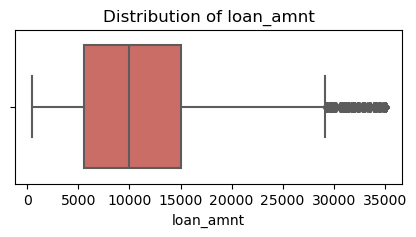

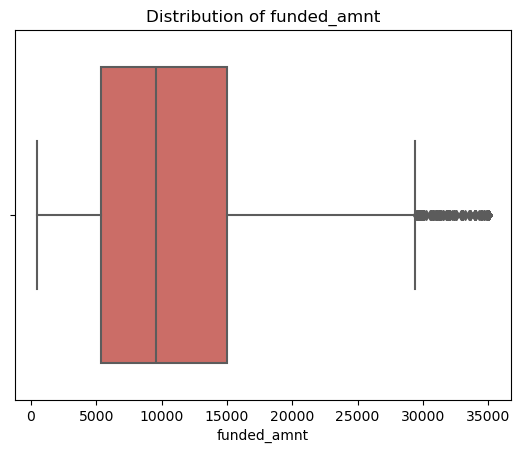

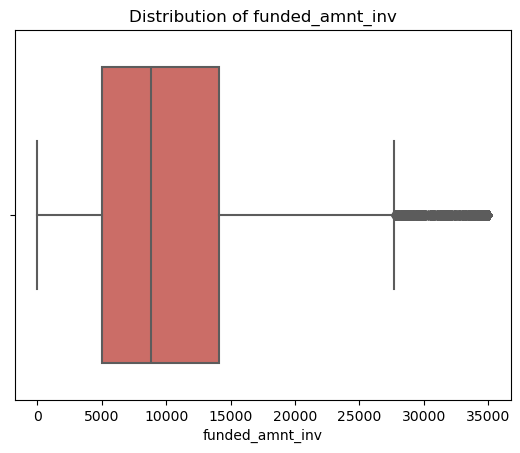

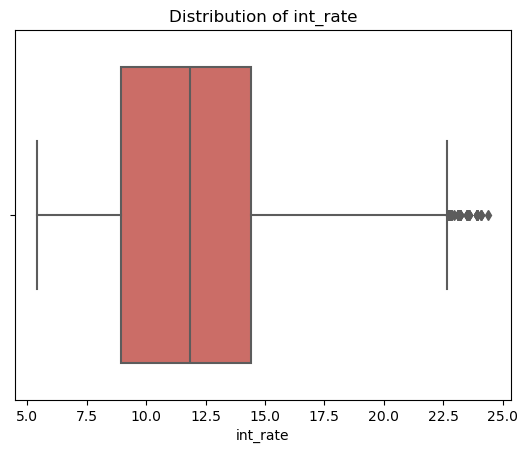

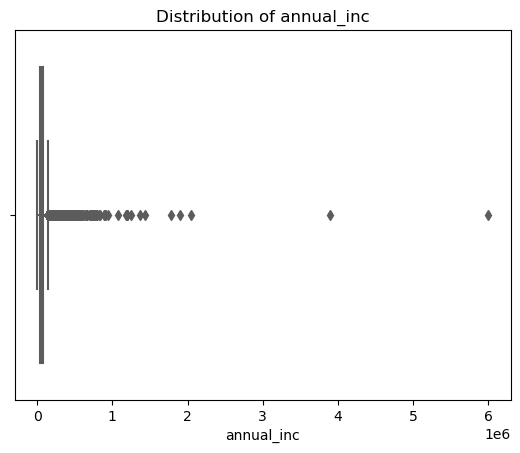

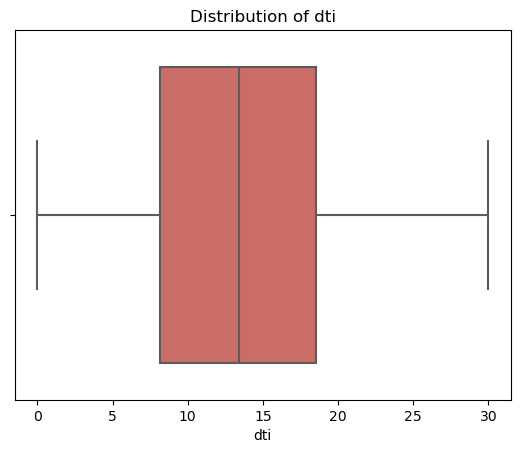

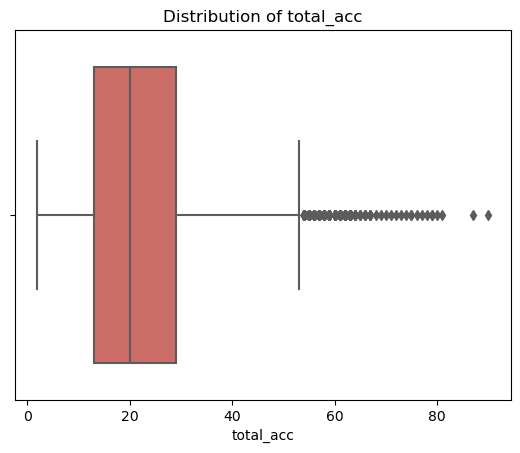

In [42]:
# Checking if there any outliners in numerical columns so that we can remove them
# Plotting box plot for each numerical variable from outliner_column

plt.figure(figsize=[5,2])
for i in outliner_column:
    sns.boxplot(x=loan_df[i],orient='h',palette='hls')
    plt.title("Distribution of {0}".format(i))
    plt.show()



**Observation:**

1. For loan_amnt,funded_amnt,funded_amnt_inv columns, the upper fence is around ~ 30K and the outliners go until ~ 35k so removing outliners is not meaningful as there is not much difference.
2. For int_rate column, the fence is around ~ 22 and the outliners go until ~ 24 so removing outliners is not meaningful as there is not much difference.
3. For annual_inc column, we can see there are outliners, persons whose salary goes upto ~ 6M so we need to remove outliners from this column
4. For dti column, there are no outliners
5. For total_acc, there are few outliners, we can remove them based on further analysis

In [43]:
# Removing Outliners from annual_inc column. We will take threshold of 95 percentile

print("Info before removing outliners:/n",loan_df.annual_inc.describe())
loan_df=loan_df[loan_df.annual_inc<=loan_df.annual_inc.quantile(0.95)]
print("Info after removing outliners:/n",loan_df.annual_inc.describe())



Info before removing outliners:/n count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64
Info after removing outliners:/n count     35675.000000
mean      61458.271977
std       27774.492578
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       78000.000000
max      142000.000000
Name: annual_inc, dtype: float64


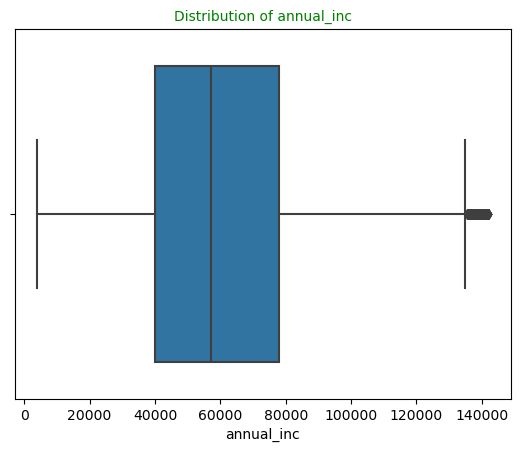

In [44]:
# ploting boxplot again for annual_inc column

sns.boxplot(x=loan_df.annual_inc,orient='h')
plt.title("Distribution of annual_inc",fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

# Graph looks good for analysis

In [45]:
## checking trend of values in total_acc using line chart 

px.line(sorted(loan_df.annual_inc),width=750,height=350,title='Trend of total_acc',labels={'value':'Total_acc','index':'Position in Data'}).show()

#Observation: trend looks continous we will not remove outliners

## 4. Univariate Analysis

### Segregate the columns as ordered categorical, unordered categorical, quantitative columns

In [46]:

ordered_categorical=['grade','sub_grade','emp_length','month','year','term']
unordered_categorical=['home_ownership','verification_status','loan_status','purpose','addr_state']
quantitative=['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','pub_rec','total_acc','pub_rec_bankruptcies']

### 4.1 Perform univariate analysis on unordered categorical columns 

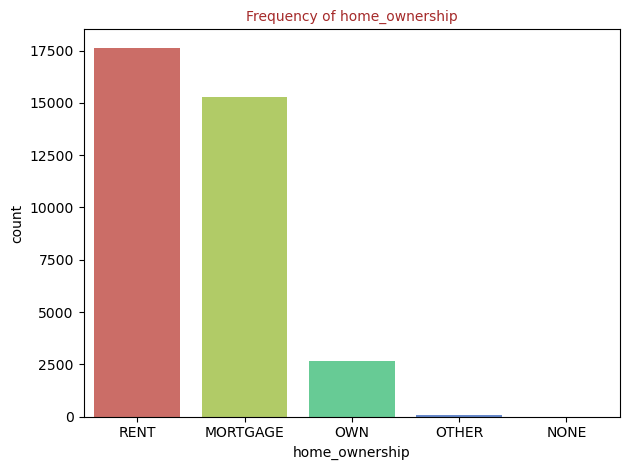

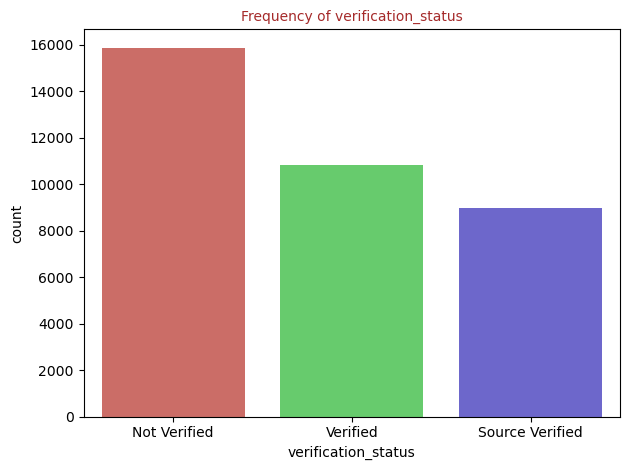

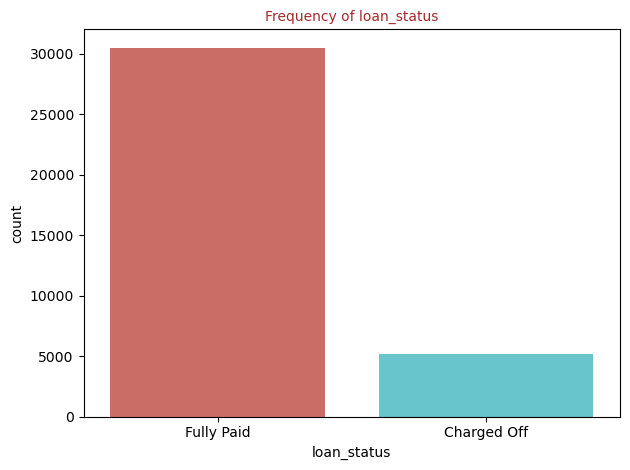

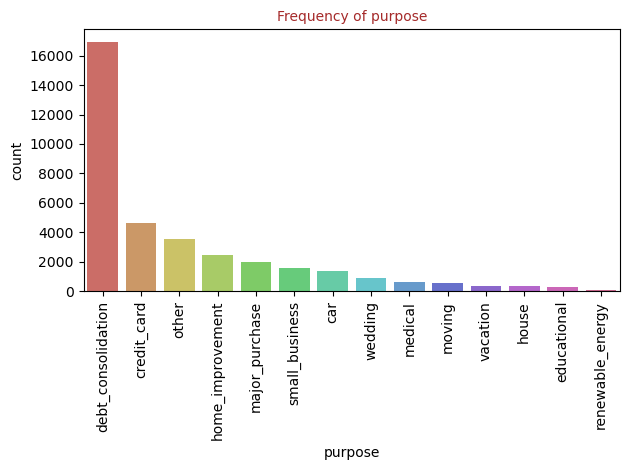

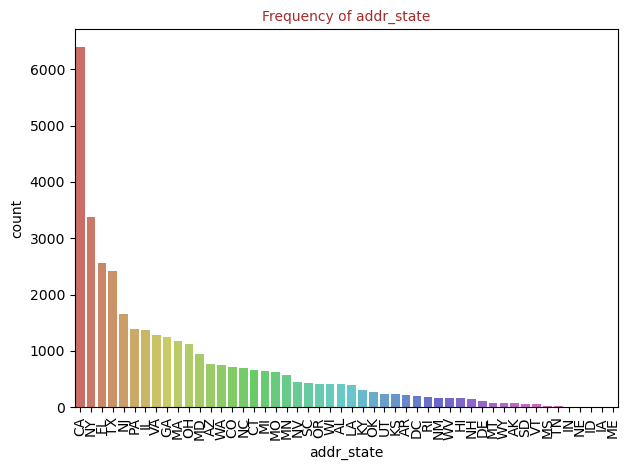

In [47]:
# Determine frequency of all unordered_categorical variables using countplot

plt.rcParams["figure.autolayout"] = True
for i in unordered_categorical:
    sns.countplot(data=loan_df,x=i,order = loan_df[i].value_counts().index,palette='hls')
    plt.title("Frequency of {0}".format(i),fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})
    if i in ('purpose','addr_state'):
        plt.xticks(rotation=90)
    plt.show()


**Observation**
1. Defaulted loans are low in numbers as compared to Fully paid loans
2. The highest number of loans taken are from California state, followed by New York and so on.
3. Maximum type of loans taken belong to debt_consolidation category means majority of people like to combine all their loans in single loan
4. Approximately half of the borrower population are verified.
5. Majority of the people have rented or mortgage property.

### 4.2 Perform univariate analysis on Ordered Categorical Variables

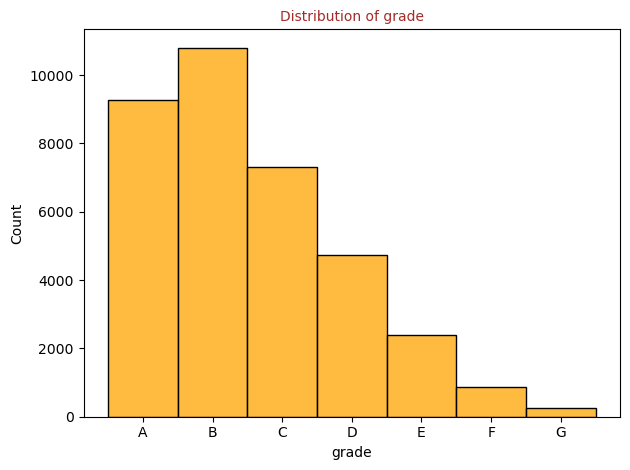

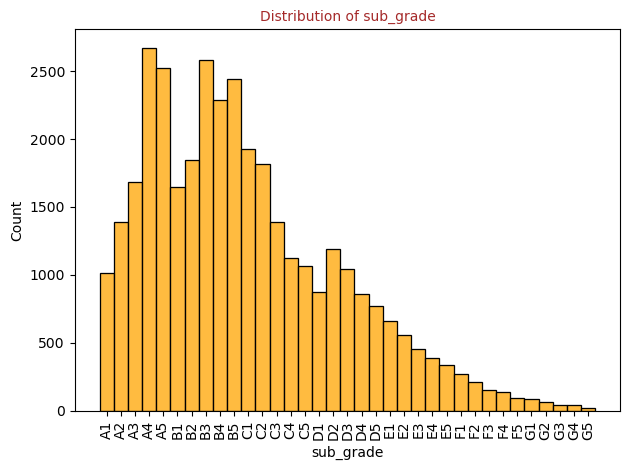

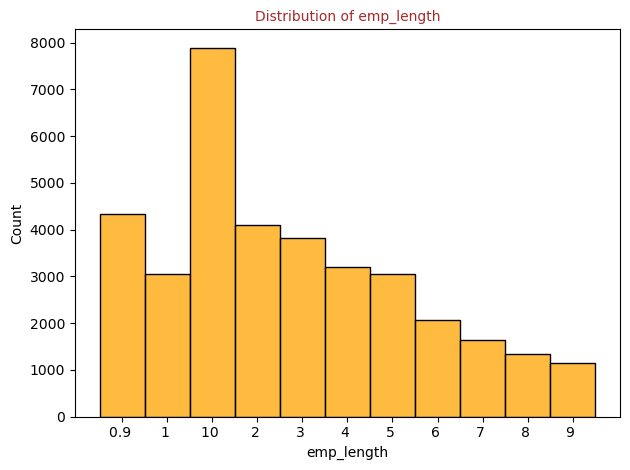

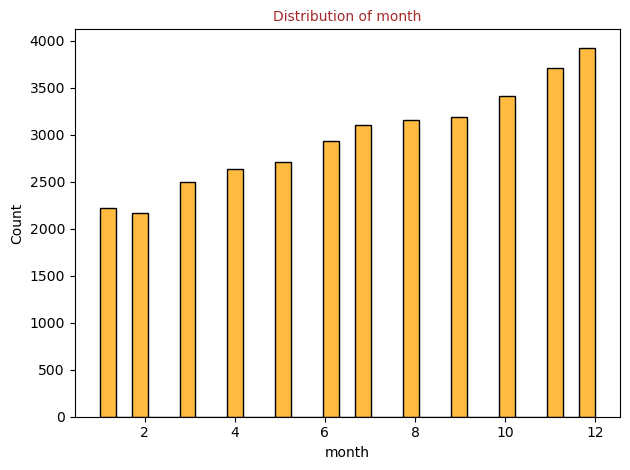

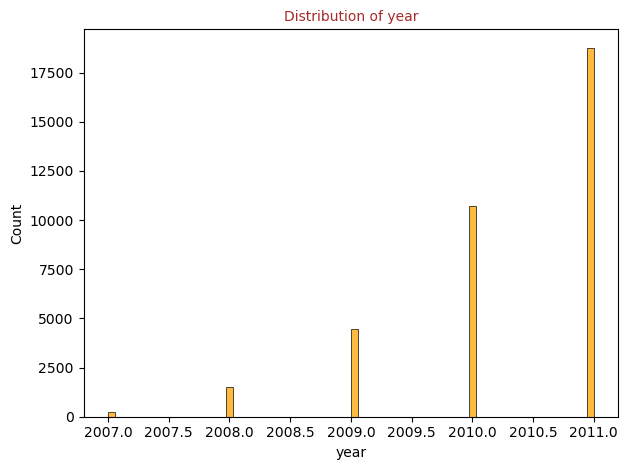

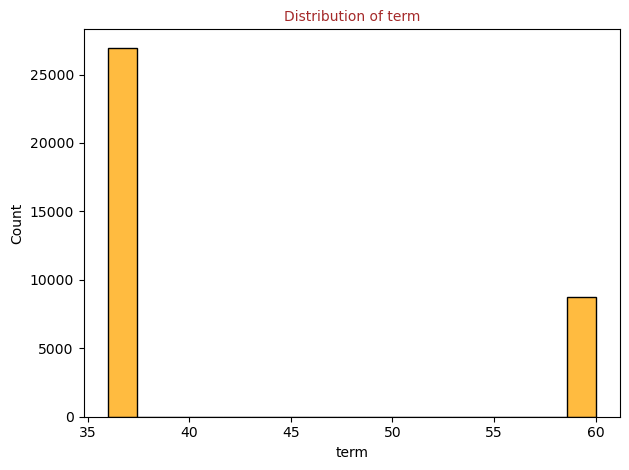

In [48]:
#Distribution of ordered categorical variables using histplot

plt.rcParams["figure.autolayout"] = True
for i in ordered_categorical:
    sns.histplot(data=loan_df,x=i,color='Orange')
    plt.title("Distribution of {0}".format(i),fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})
    if i =='sub_grade':
        plt.xticks(rotation=90)
    plt.show()

**Observation**
1. Most loans belong to grade 'A' and 'B' and the number goes down as grade decreases, which also aligns to our observation that majority of the loans are fully paid so they might belong to grade A or B.
2. SUbgrade distribution aligns with grade distribution
3. Maximum borrowers have more than 10 years of employment
4. Number of borrowers increases as increase in months from Sept, Oct, Nov, Dec. Highest number of loans are taken in month of December
5. As year increases, number of borrowers increases. The loan approval rate increases exponentially with increase in year with highest reported in 2011.
6. The term of loan taken is highest around 36 months followed by 60 months.

#### 4.3 Perform univariate analysis on quantitative variables

In [49]:
# Get summary metric of all numeric columns
# quantitative=['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','pub_rec','total_acc','pub_rec_bankruptcies']

loan_df[quantitative].describe()


loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count  35675.000000  35675.000000     35675.000000  35675.000000   
mean   10752.725999  10504.067274      9950.549686     11.919305   
std     7054.803460   6807.568357      6742.558083      3.658499   
min      500.000000    500.000000         0.000000      5.420000   
25%     5050.000000   5000.000000      5000.000000      8.940000   
50%     9500.000000   9050.000000      8412.210000     11.710000   
75%    15000.000000  14400.000000     13750.000000     14.350000   
max    35000.000000  35000.000000     35000.000000     24.400000   

        installment     annual_inc           dti       pub_rec     total_acc  \
count  35675.000000   35675.000000  35675.000000  35675.000000  35675.000000   
mean     314.030584   61458.271977     13.457463      0.055081     21.670385   
std      199.527031   27774.492578      6.649145      0.237059     11.221524   
min       15.690000    4000.000000      0.000000      0.000000      2.000000   
25%      164.550000   40000.000000      8.370000      0.000000     13.000000   
50%      272.950000   57000.000000     13.590000      0.000000     20.000000   
75%      411.410000   78000.000000     18.700000      0.000000     28.000000   
max     1305.190000  142000.000000     29.990000      4.000000     90.000000   

       pub_rec_bankruptcies  
count          35675.000000  
mean               0.042186  
std                0.201713  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                2.000000

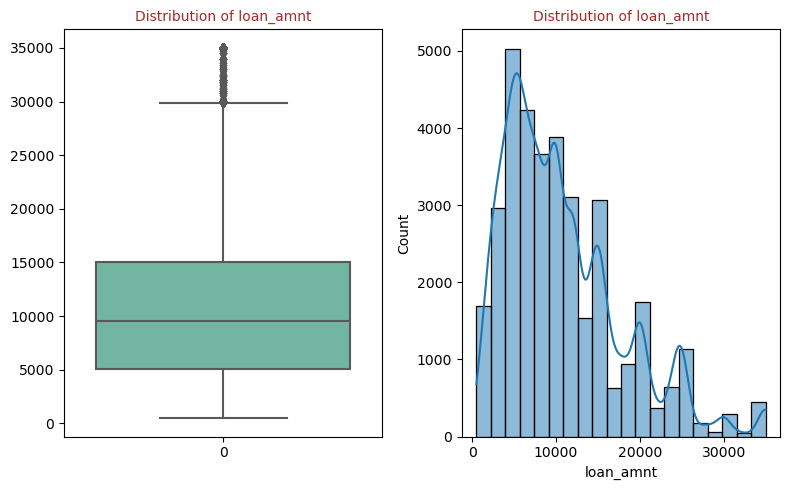

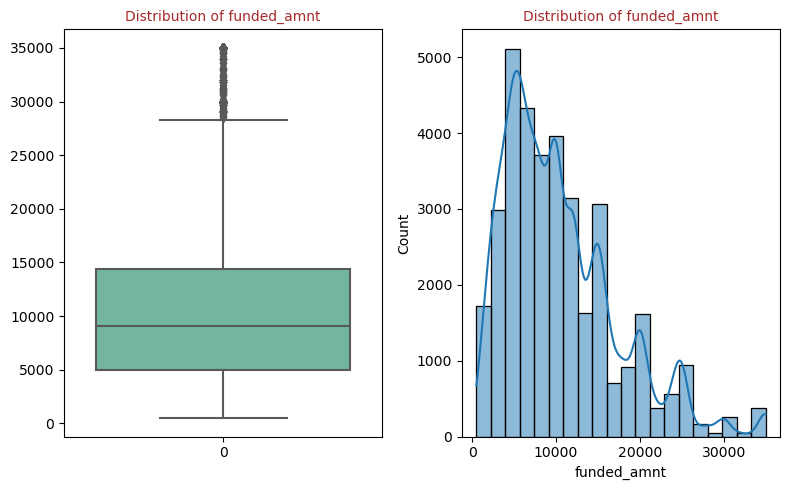

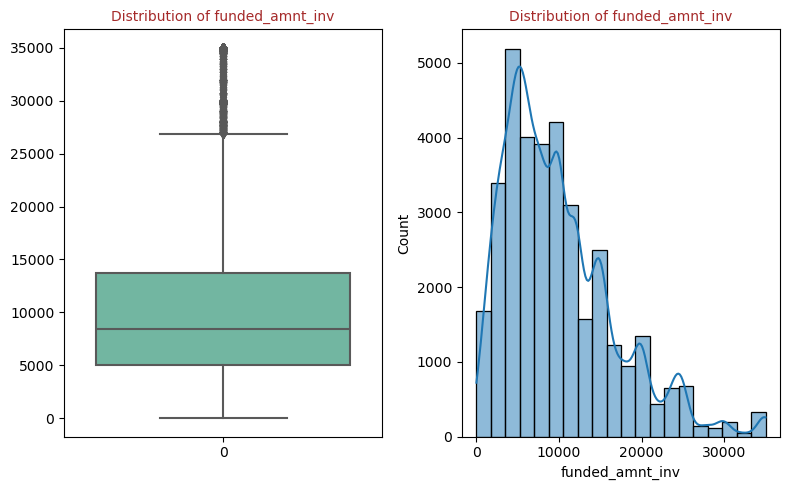

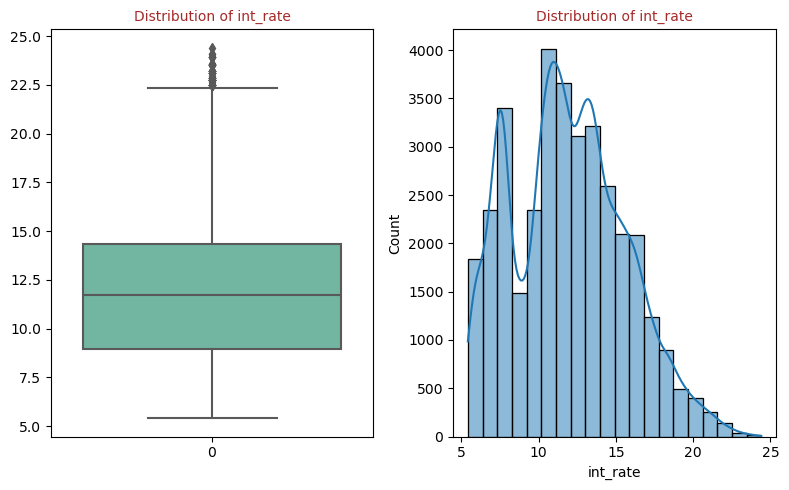

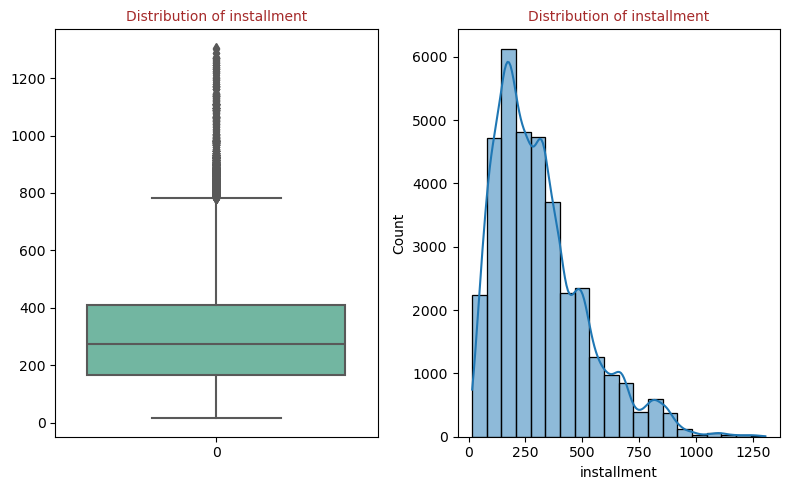

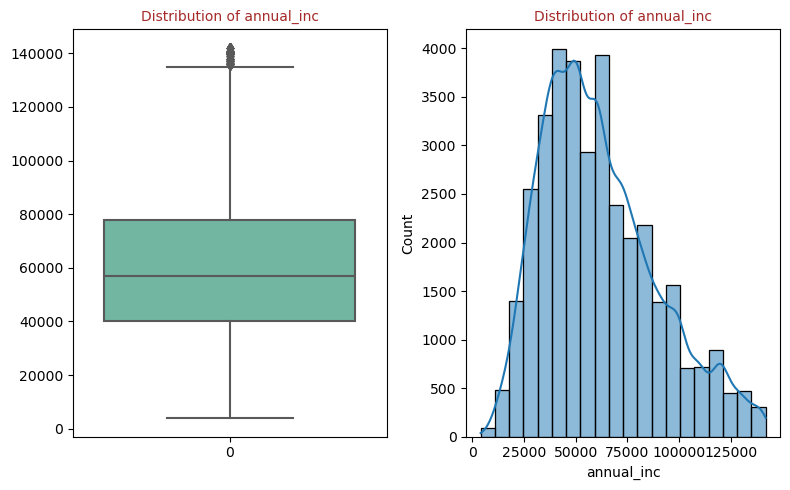

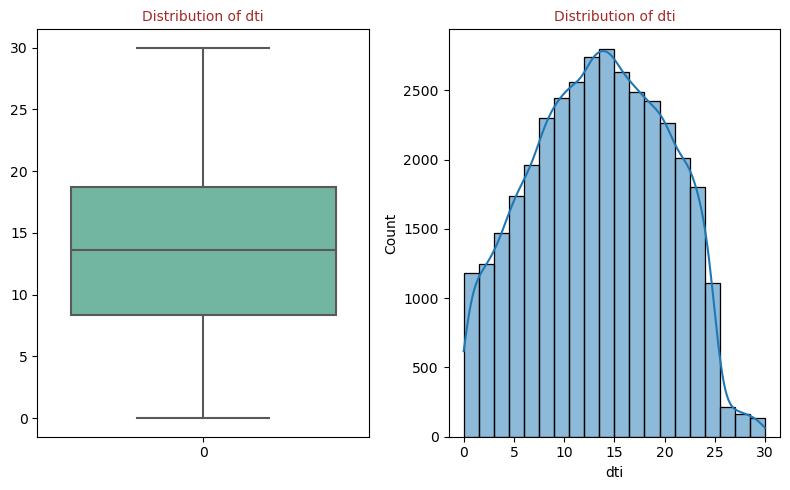

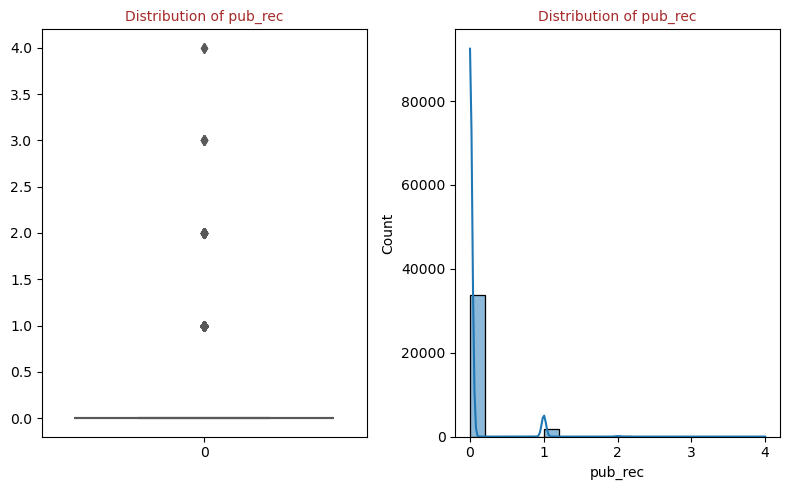

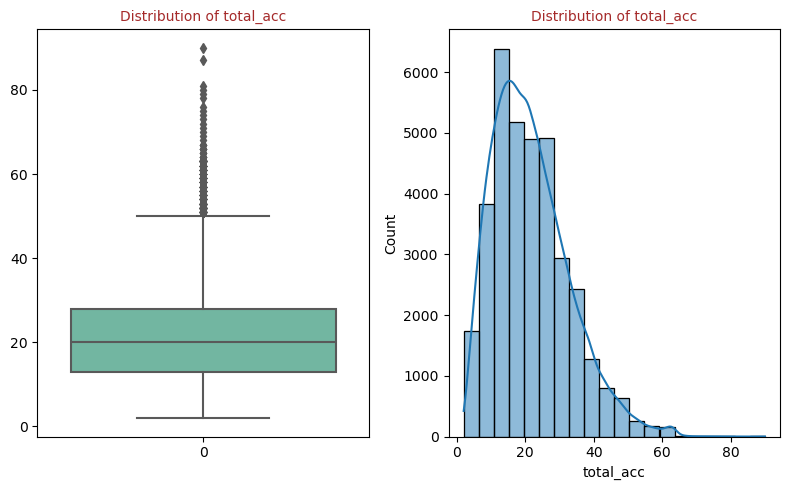

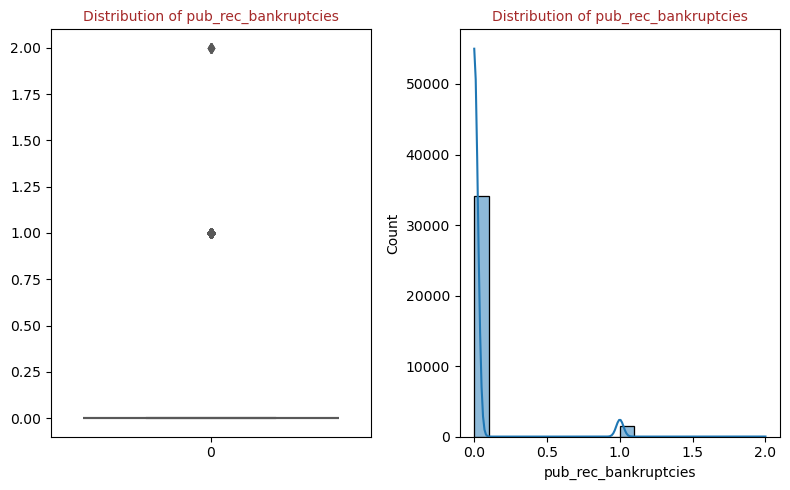

In [50]:
# Plotting boxplot and displot of quantitative variables

for i in quantitative:
    fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(8,5))
    sns.boxplot(data=loan_df[i],ax=axes[0],palette='Set2')
    axes[0].set_title("Distribution of {0}".format(i),fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})
    sns.histplot(data=loan_df[i],kde=True,ax=axes[1],bins=20,palette='husl')
    axes[1].set_title("Distribution of {0}".format(i),fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})
    plt.tight_layout()
    plt.show()

**Observations**
1. Majority of Loan amount lies between 5000 to 15000. Also, from box & distribution plot we can see that 50% of loan amount lies below 10k (approx.) and very few of them are on higher side. Distribution plot is left skewed which aligns to our observation
2. Distribution of funded amount, funded amounts by investors aligns with distribution of loan amount means whatever borrowers got the required loan amount.
3. Majority of the interest rate given by Lending CLub lies between 8.5% to 14.5% with a dip near 10%
4. Monthly installment is crowded between 165 to 415 (approx.) per month and negligible after 800
5. 75% of annual income lies below 80000 means people having income on higher side is less
6. Spread of high dti is more means there are many borrowers having large dti ratio.
7. Majority of borrowers having 0 public records, very few goes till 4
8. Majority of borrowers (75%) have total number of credit lines (total_acc) below 30

#### 5. Perform  Segmented analysis

In [51]:
#cat_col=['grade','sub_grade','emp_length','home_ownership','verification_status','loan_status','purpose','addr_state']
#num_col=['id','loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','annual_inc','dti','pub_rec','total_acc','pub_rec_bankruptcies']
#date_col=['issue_d']

#Segreagating columns for segmented analysis

ordered_categorical=['grade','sub_grade','emp_length','month','year','term']
unordered_categorical=['home_ownership','verification_status','loan_status','purpose','addr_state']
quantitative=['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','pub_rec','total_acc','pub_rec_bankruptcies']



##### 5.1 Segmented Quantitative Analysis

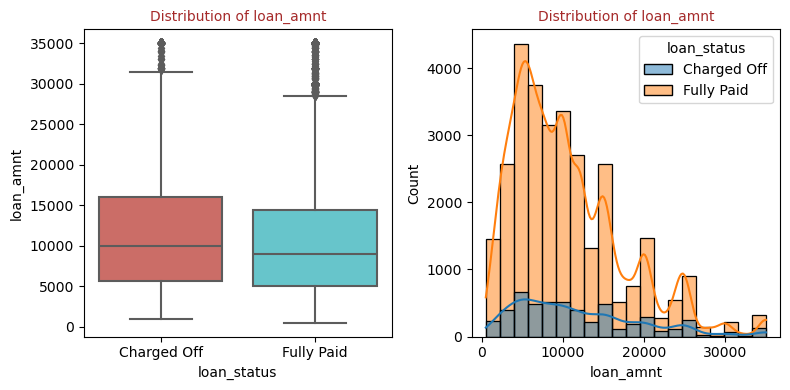

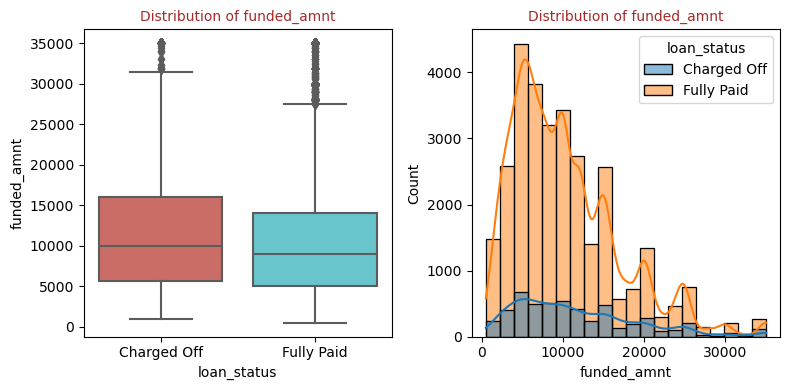

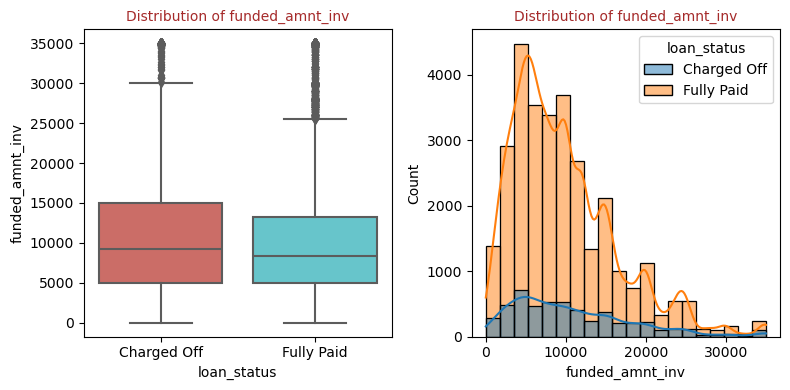

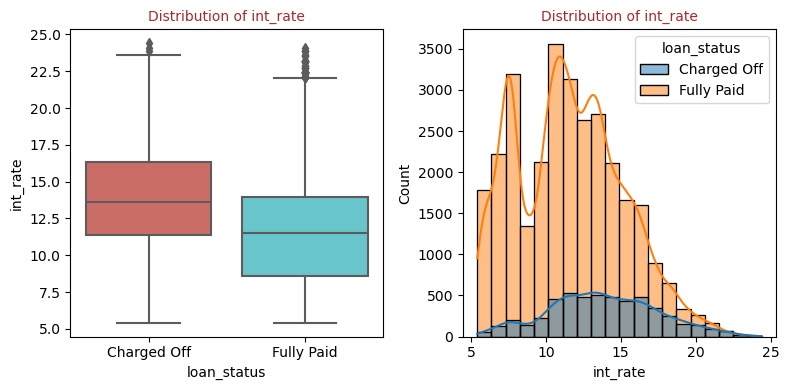

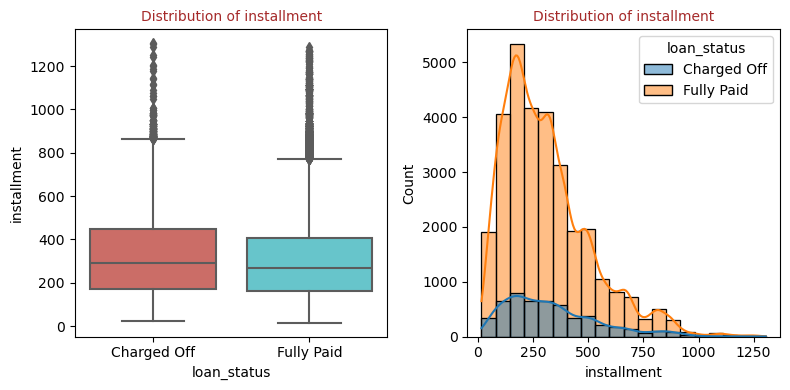

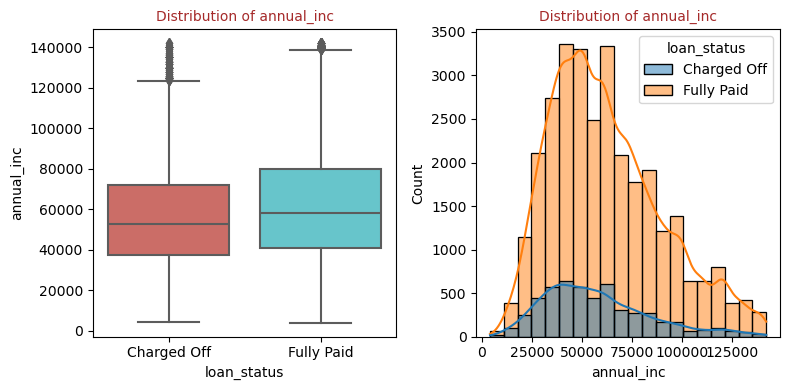

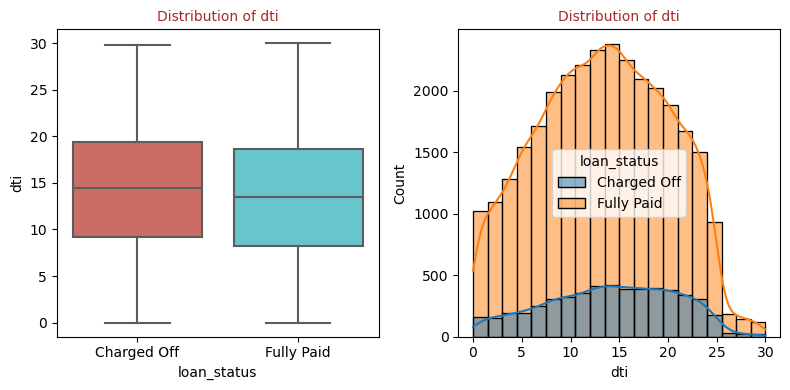

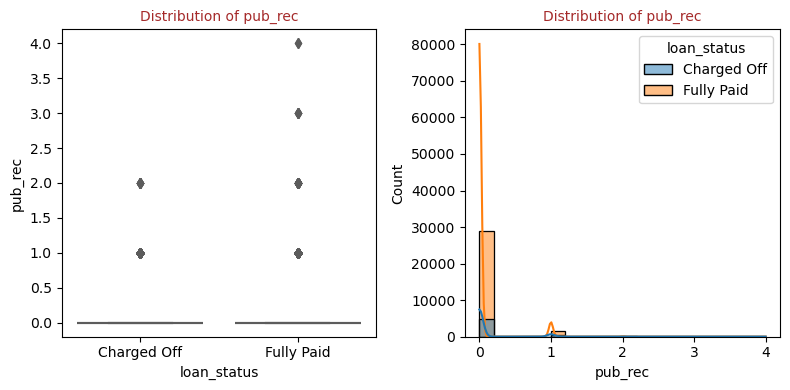

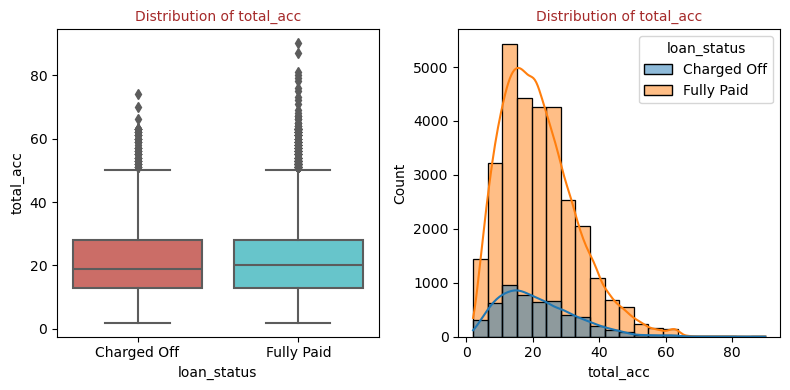

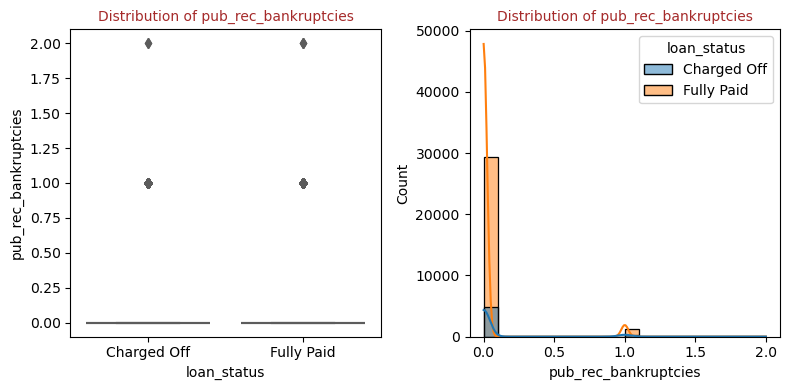

In [52]:
#Plotting boxplot and histplot for segmented quantitaive columns

for i in quantitative:
    fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(8,4))
    #sns.boxplot(data=loan_df[i],ax=axes[0])
    sns.boxplot(data=loan_df,y=i,x='loan_status',ax=axes[0],palette='hls')
    axes[0].set_title("Distribution of {0}".format(i),fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})
    sns.histplot(data=loan_df,x=i,kde=True,ax=axes[1],bins=20,hue='loan_status')
    axes[1].set_title("Distribution of {0}".format(i),fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})
    plt.tight_layout()
    plt.show()

In [53]:

#fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(8,15))
#axes=axes.flatten()
#for i, y_var in enumerate(quantitative):
    #plt.figure(figsize=[4,4])
 #   sns.boxplot(data=loan_df,x='loan_status',y=y_var,palette='hls',ax=axes[i])
  #  axes[i].set_title("Variation of {0} vs Loan Status".format(y_var),fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Brown'})

**Conclusion**
1. Majority of the people who are charged off have taken high loan amount as compared to people who fully paid the loan. From the loan_amnt box plot, 75 percentile of charged-off borrowers is higher than 75 percentile of fully paid borrowers.Borrowers taking loan in the range 0-16k are mostly getting defaulted
2. Distribution of funded amounts aligns with loan amount distribution
3. Interest rate for charged off borrowers is high as compared to fully paid borrowers. High interest rate can lead to default borrowers.
4. Installments shows almost similar distribution for charged off and fully paid borrowers
5. Fully paid borrowers shown to have more annual income than charged off borrowers. High income might lead to less risky borrowers. Defaulters have 75% of annual income < 65k
6. No significant difference in DTI distribution for fully paid and charged off category but majority of charged off borrowers shows higher dti as compared to majority of full paid borrowers.
  

#### 5.2 Segmented Categorical Analysis

In [54]:
#Creating a list of segmented categorical variables

segmented_categorical=['grade','emp_length','month','year','term','home_ownership','purpose','addr_state']


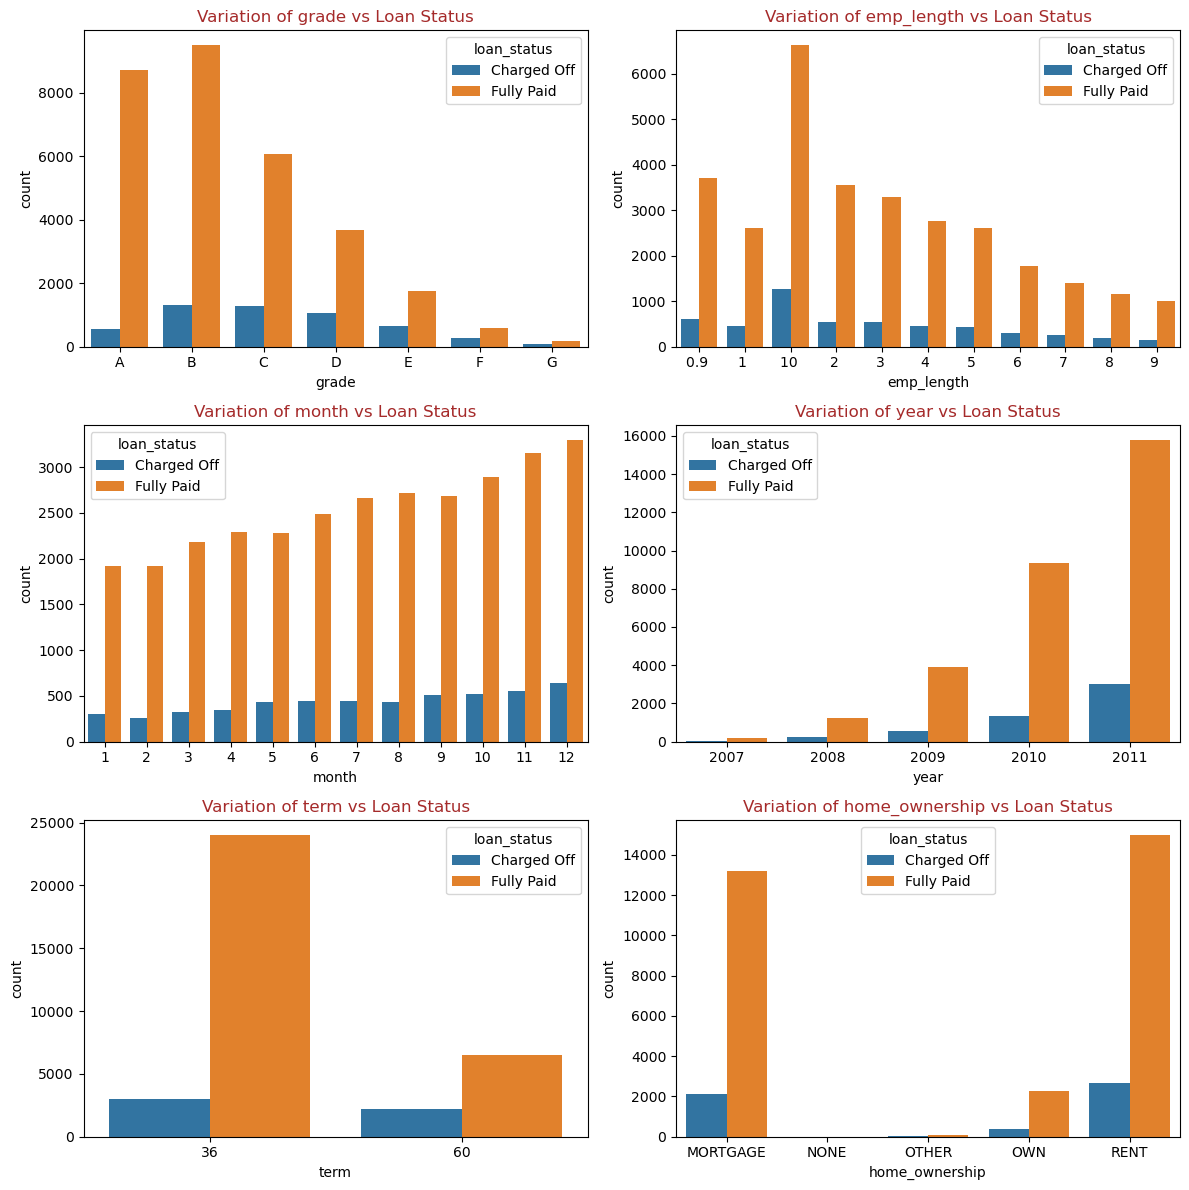

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

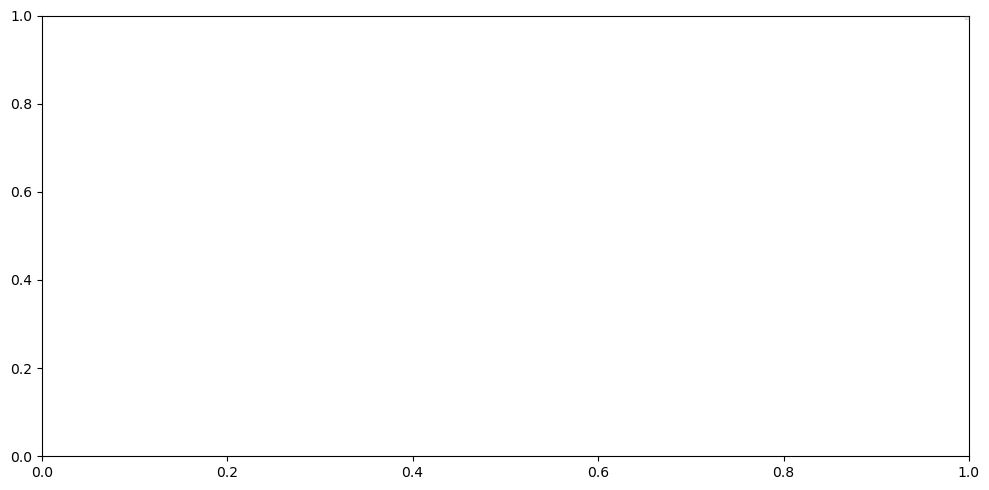

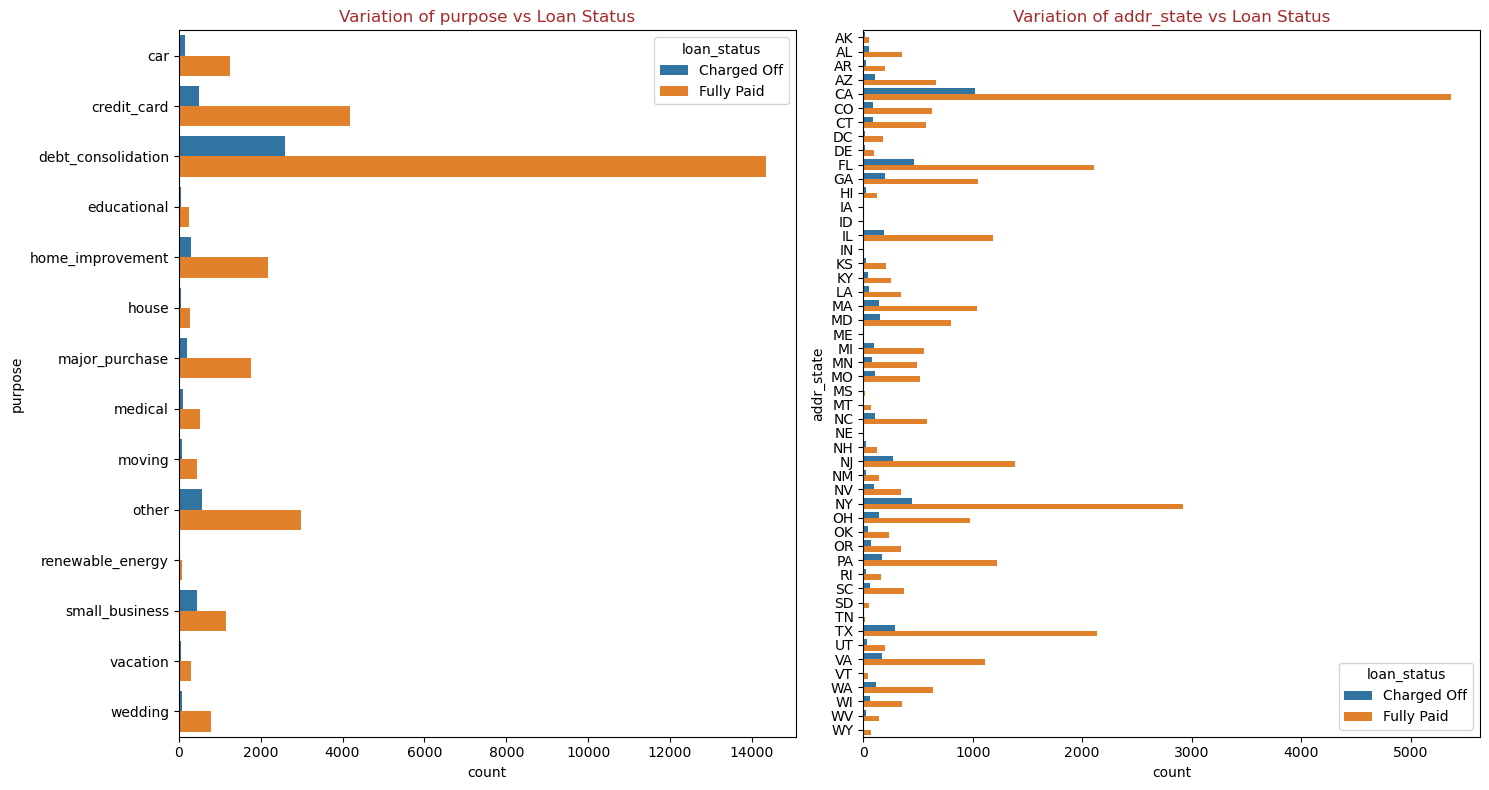

<Figure size 800x500 with 0 Axes>

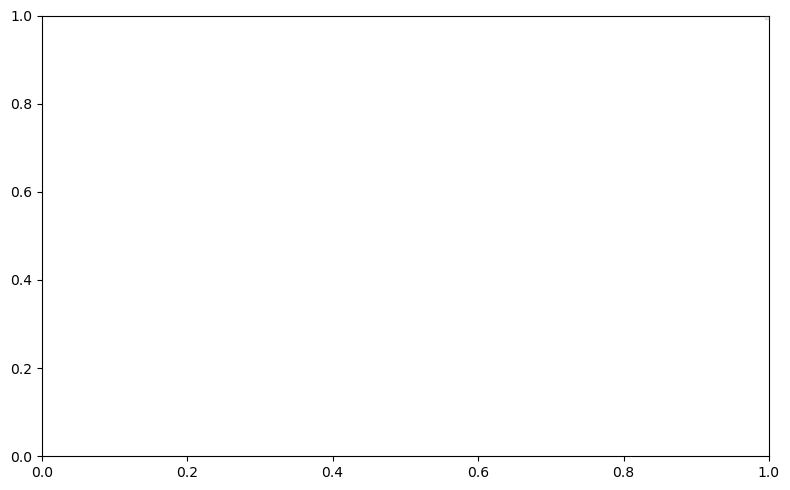

In [55]:
#Plotting countplot for segmented categorical variables

fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(12,12))
axes=axes.flatten()
for i, y_var in enumerate(['grade','emp_length','month','year','term','home_ownership']):
     plt.figure(figsize=[10,5])
     sns.countplot(data=loan_df,hue='loan_status',x=y_var,ax=axes[i])
     axes[i].set_title("Variation of {0} vs Loan Status".format(y_var),fontdict={'fontsize': 12, 'fontweight' : 7, 'color' : 'Brown'})        
plt.legend('loan_status', fontsize="2")
plt.tight_layout()
plt.show()

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,8))
axes=axes.flatten()
for i, y_var in enumerate(['purpose','addr_state']):
     plt.figure(figsize=[8,5])
     sns.countplot(data=loan_df,hue='loan_status',y=y_var,ax=axes[i])
     axes[i].set_title("Variation of {0} vs Loan Status".format(y_var),fontdict={'fontsize': 12, 'fontweight' : 7, 'color' : 'Brown'})        

plt.legend('loan_status', fontsize="2")
plt.tight_layout()
plt.show()

**Observation**

1. For B and C grades, the number of charged off borrowers are almost same but there is a significant difference in fully paid borrowers in B and C grades.Majority of the borrowers who fully repaid the loan were assigned B grade.
2. Charged off and fully paid borrowers are high where employee experience is more than 10+ years as compared to other years. We need additional analysis to derive on an inference
3. 36 months of term has higher chances of repaying full loan as compared to 60 months terms.
4. Charged off and fully paid borrowers are highest among debt_consolidation category

## 6.  Bivariate Analysis

In [56]:
#cat_col=['grade','sub_grade','emp_length','home_ownership','verification_status','loan_status','purpose','addr_state']
#num_col=['id','loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','annual_inc','dti','pub_rec','total_acc','pub_rec_bankruptcies']
#date_col=['issue_d']

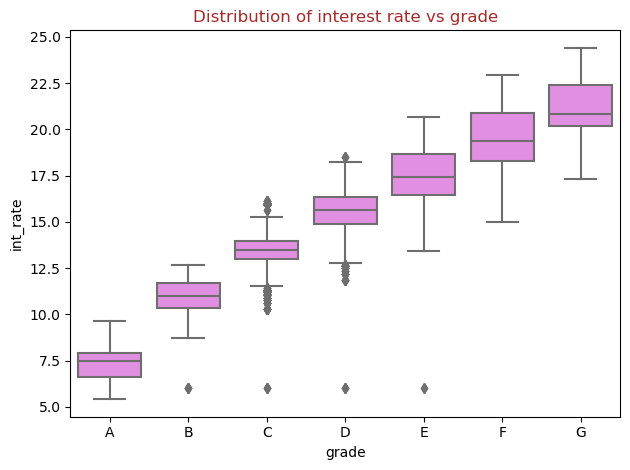

In [57]:
# Distribution of interest rate vs grade

sns.boxplot(x='grade',y='int_rate',data=loan_df,color='violet')
plt.title("Distribution of interest rate vs grade",fontdict={'fontsize': 12, 'fontweight' : 7, 'color' : 'Brown'})
plt.show()

# Observation: People having lower grades have higher interest rates

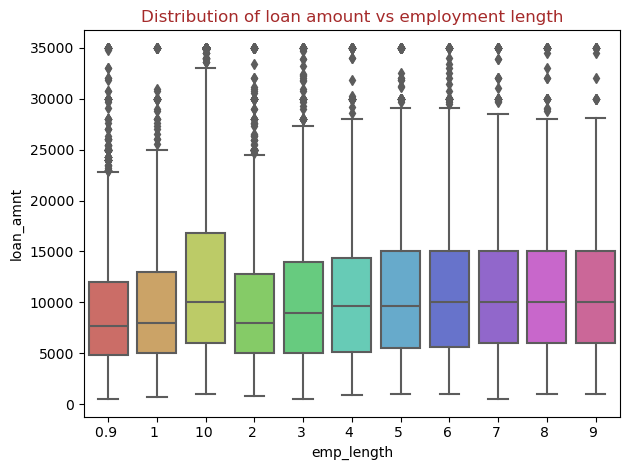

In [58]:
# Distribution of loan amount vs employment length

sns.boxplot(x='emp_length',y='loan_amnt',data=loan_df,palette='hls')
plt.title("Distribution of loan amount vs employment length",fontdict={'fontsize': 12, 'fontweight' : 7, 'color' : 'brown'})
plt.show()

# Observation: People with >10 years of experience have taken high loan amount

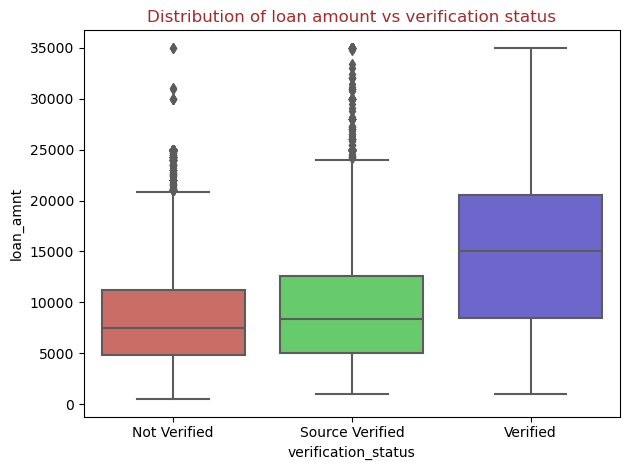

In [59]:
# Distribution of loan amount vs verification status

sns.boxplot(x='verification_status',y='loan_amnt',data=loan_df,palette='hls')
plt.title("Distribution of loan amount vs verification status",fontdict={'fontsize': 12, 'fontweight' : 7, 'color' : 'Brown'})
plt.show()

# Observation: Verified applicants were issued high amount of loan

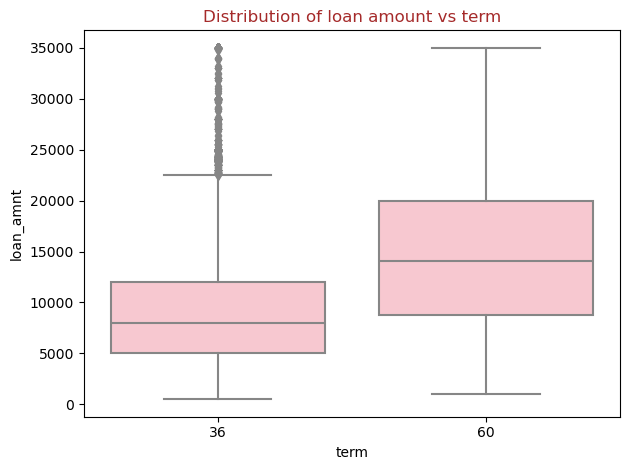

In [60]:
# Distribution of loan amount vs term

sns.boxplot(x='term',y='loan_amnt',data=loan_df,color='pink')
plt.title("Distribution of loan amount vs term",fontdict={'fontsize': 12, 'fontweight' : 7, 'color' : 'Brown'})
plt.show()

# Observation: People prefer to take 60 months term for higher loan amounts

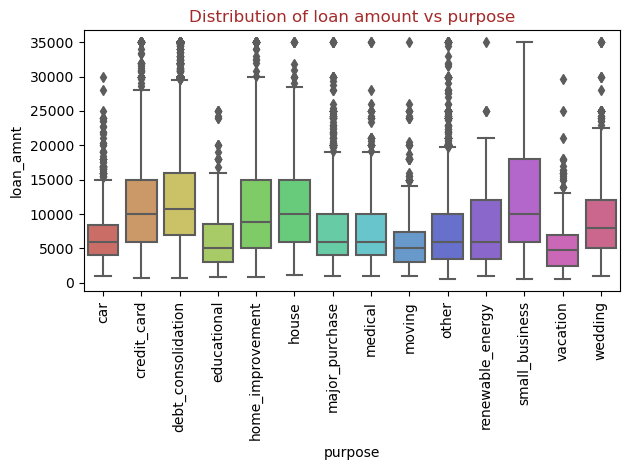

In [61]:
# Distribution of loan amount vs purpose

sns.boxplot(x='purpose',y='loan_amnt',data=loan_df,palette='hls')
plt.title("Distribution of loan amount vs purpose",fontdict={'fontsize': 12, 'fontweight' : 7, 'color' : 'Brown'})
plt.xticks(rotation=90)
plt.show()

# Observation: Highest loan amount is issued for small businesses

In [62]:
loan1=loan_df
loan1

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0      1077501       5000         5000           4975.0    36     10.65   
1      1077430       2500         2500           2500.0    60     15.27   
2      1077175       2400         2400           2400.0    36     15.96   
3      1076863      10000        10000          10000.0    36     13.49   
5      1075269       5000         5000           5000.0    36      7.90   
...        ...        ...          ...              ...   ...       ...   
39711    92402       5000         5000            700.0    36      8.70   
39712    92187       2500         2500           1075.0    36      8.07   
39713    90665       8500         8500            875.0    36     10.28   
39714    90395       5000         5000           1325.0    36      8.07   
39716    87023       7500         7500            800.0    36     13.75   

       installment grade sub_grade emp_length  ...    issue_d  loan_status  \
0           162.87     B        B2        10   ... 2011-12-01   Fully Paid   
1            59.83     C        C4       0.9   ... 2011-12-01  Charged Off   
2            84.33     C        C5        10   ... 2011-12-01   Fully Paid   
3           339.31     C        C1        10   ... 2011-12-01   Fully Paid   
5           156.46     A        A4         3   ... 2011-12-01   Fully Paid   
...            ...   ...       ...        ...  ...        ...          ...   
39711       158.30     B        B1         5   ... 2007-07-01   Fully Paid   
39712        78.42     A        A4         4   ... 2007-07-01   Fully Paid   
39713       275.38     C        C1         3   ... 2007-07-01   Fully Paid   
39714       156.84     A        A4       0.9   ... 2007-07-01   Fully Paid   
39716       255.43     E        E2       0.9   ... 2007-06-01   Fully Paid   

                  purpose addr_state    dti pub_rec total_acc  \
0             credit_card         AZ  27.65       0         9   
1                     car         GA   1.00       0         4   
2          small_business         IL   8.72       0        10   
3                   other         CA  20.00       0        37   
5                 wedding         AZ  11.20       0        12   
...                   ...        ...    ...     ...       ...   
39711         credit_card         CO  15.55       0        29   
39712    home_improvement         CO  11.33       0        40   
39713         credit_card         NC   6.40       0         9   
39714  debt_consolidation         MA   2.30       0        20   
39716  debt_consolidation         MA  14.29       0         8   

       pub_rec_bankruptcies  year  month  
0                       0.0  2011     12  
1                       0.0  2011     12  
2                       0.0  2011     12  
3                       0.0  2011     12  
5                       0.0  2011     12  
...                     ...   ...    ...  
39711                   0.0  2007      7  
39712                   0.0  2007      7  
39713                   0.0  2007      7  
39714                   0.0  2007      7  
39716                   0.0  2007      6  

[35675 rows x 23 columns]

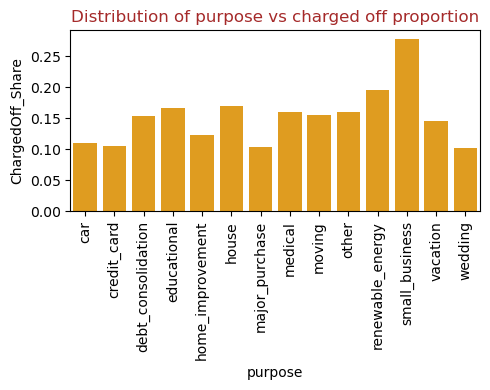

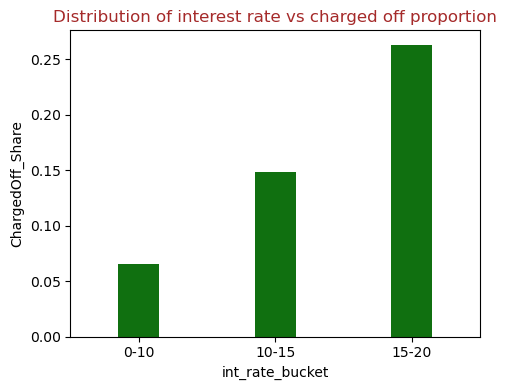

Text(0, 0.5, 'count')

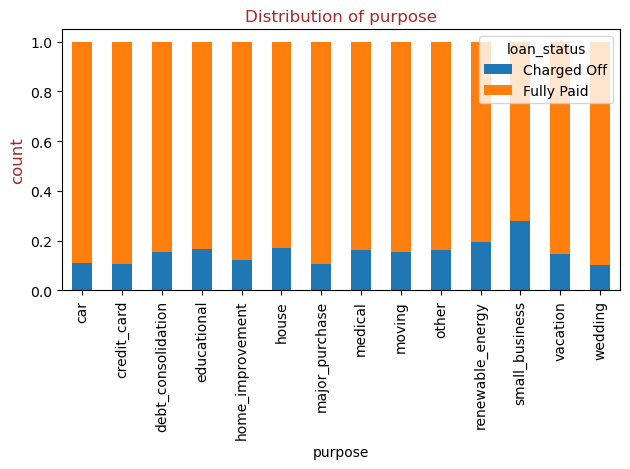

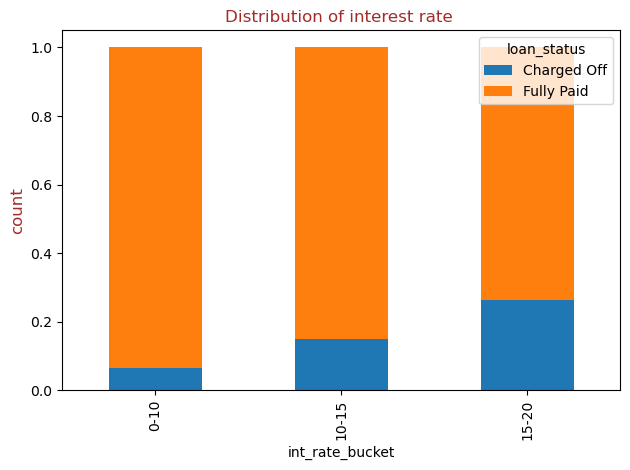

In [63]:
#cat_col=['grade','sub_grade','emp_length','home_ownership','verification_status','loan_status','purpose','addr_state']
#num_col=['id','loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','annual_inc','dti','pub_rec','total_acc','pub_rec_bankruptcies']
#date_col=['issue_d']

# Distribution of purpose vs charged off proportion via barplot

# Creating derived table containing count of loan status for purpose
loan_purpose=loan_df.groupby(['purpose','loan_status']).loan_status.count().unstack()
loan_purpose['purpose']=loan_purpose.index
# Calculating charge off proportion for each purpose and storing it in a new column
loan_purpose['ChargedOff_Share']=loan_purpose['Charged Off']/(loan_purpose['Charged Off']+loan_purpose['Fully Paid'])
plt.figure(figsize=(5,4))
#Plotiing the graph..
sns.barplot(data=loan_purpose,x='purpose',y='ChargedOff_Share',color='orange')
plt.title("Distribution of purpose vs charged off proportion",fontdict={'fontsize': 12, 'fontweight' : 7, 'color' : 'Brown'})
plt.xticks(rotation=90)
plt.show()

# Distribution of interest rate vs charged off proportion via barplot

loan_int_rate=loan_df
# Creating buckets of interest rates
def bucket_ir(col):
    if col<=10:
        return '0-10'
    elif (col>10) and (col<=15):
        return '10-15'
    else:
        return '15-20'
loan_int_rate['int_rate_bucket']=loan_int_rate.apply(lambda x : bucket_ir(x['int_rate']),axis=1)

# Creating derived table containing count of loan status for each interest rate bucket
loan_int_rate=loan_df.groupby(['int_rate_bucket','loan_status']).loan_status.count().unstack()
loan_int_rate['int_rate_bucket']=loan_int_rate.index
# Calculating charge off proportion for each interest rate bucket and storing it in a new column
loan_int_rate['ChargedOff_Share']=loan_int_rate['Charged Off']/(loan_int_rate['Charged Off']+loan_int_rate['Fully Paid'])
plt.figure(figsize=(5,4))
# Plotting the graph..
sns.barplot(data=loan_int_rate,x='int_rate_bucket',y='ChargedOff_Share',color='g',width=0.3)
plt.title("Distribution of interest rate vs charged off proportion",fontdict={'fontsize': 12, 'fontweight' : 7, 'color' : 'Brown'})
plt.show()


# Distribution of purpose vs loan status via crosstab for better analysis

pd.crosstab(loan_df['purpose'],loan_df['loan_status'], normalize='index').plot.bar(stacked=True)
plt.title("Distribution of purpose",fontdict={'fontsize': 12, 'fontweight' : 7, 'color' : 'Brown'})
plt.ylabel("count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# Distribution of interest rate vs loan status via crosstab for better analysis
pd.crosstab(loan_df['int_rate_bucket'],loan_df['loan_status'], normalize='index').plot.bar(stacked=True)
plt.title("Distribution of interest rate ",fontdict={'fontsize': 12, 'fontweight' : 7, 'color' : 'Brown'})
plt.ylabel("count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# Observation: Charge off proportion is highest for people taking loans for small businesses
# Observation: Charge off proportion is highest among 15-20% interest rate. Thus, high interest rate leads to risky applicants


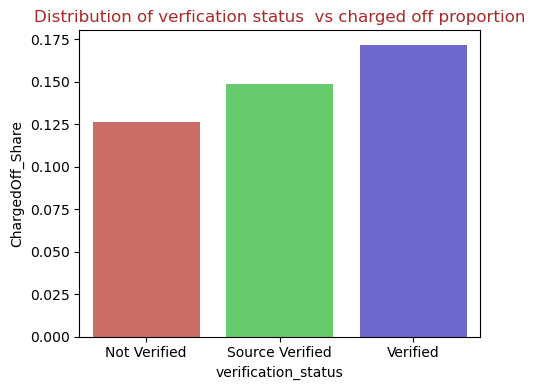

Text(0, 0.5, 'count')

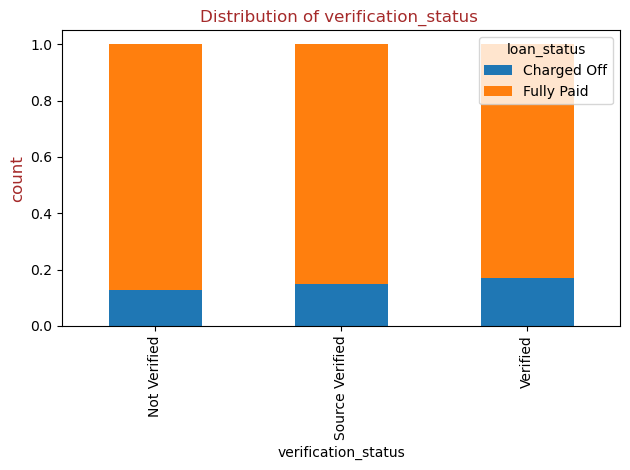

In [64]:
# Distribution of verfication status  vs charged off proportion via barplot

loan_verification=loan_df.groupby(['verification_status','loan_status']).loan_status.count().unstack()
loan_verification['verification_status']=loan_verification.index
loan_verification['ChargedOff_Share']=loan_verification['Charged Off']/(loan_verification['Charged Off']+loan_verification['Fully Paid'])
plt.figure(figsize=(5,4))
sns.barplot(data=loan_verification,x='verification_status',y='ChargedOff_Share',palette='hls')
plt.title("Distribution of verfication status  vs charged off proportion",fontdict={'fontsize': 12, 'fontweight' : 7, 'color' : 'Brown'})
plt.show()

# Distribution of verfication status  vs loan status via crosstab for better analysis

pd.crosstab(loan_df['verification_status'],loan_df['loan_status'], normalize='index').plot.bar(stacked=True)
plt.title("Distribution of verification_status ",fontdict={'fontsize': 12, 'fontweight' : 7, 'color' : 'Brown'})
plt.ylabel("count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# Observation: Charge off proportion is highest for verified applicants


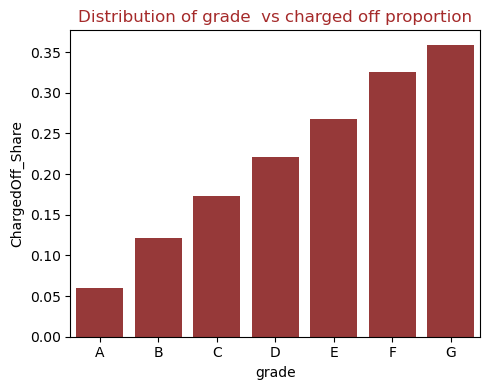

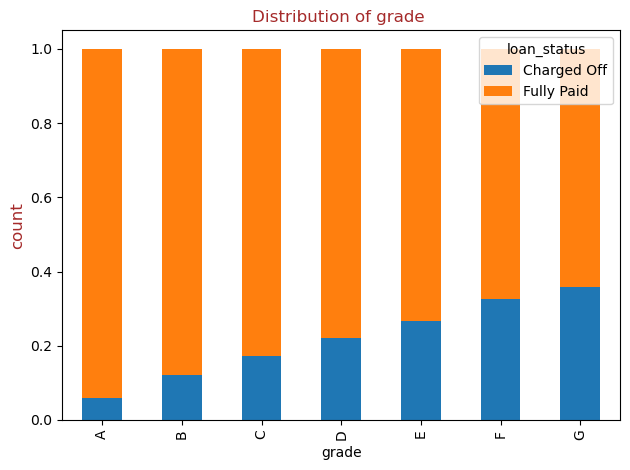

In [65]:
# Distribution of grade  vs charged off proportion via barplot

# Creating derived table containing grade and count of loan status for each grade
loan_grades=loan_df.groupby(['grade','loan_status']).loan_status.count().unstack()
loan_grades['grade']=loan_grades.index
# Calculating charge off proportion for each grade and storing it in a new column
loan_grades['ChargedOff_Share']=loan_grades['Charged Off']/(loan_grades['Charged Off']+loan_grades['Fully Paid'])
plt.figure(figsize=(5,4))
# Plotting graph
sns.barplot(data=loan_grades,x='grade',y='ChargedOff_Share',color='brown')
plt.title("Distribution of grade  vs charged off proportion",fontdict={'fontsize': 12, 'fontweight' : 7, 'color' : 'Brown'})
plt.show()

# Distribution of grade vs loan status via crosstab for better analysis

pd.crosstab(loan_df['grade'],loan_df['loan_status'], normalize='index').plot.bar(stacked=True)
plt.title("Distribution of grade ",fontdict={'fontsize': 12, 'fontweight' : 7, 'color' : 'Brown'})
plt.ylabel("count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.show()

# Charge off proportion increases as decrease in grades so people having higher grades are less risky as compared to people having lower grades

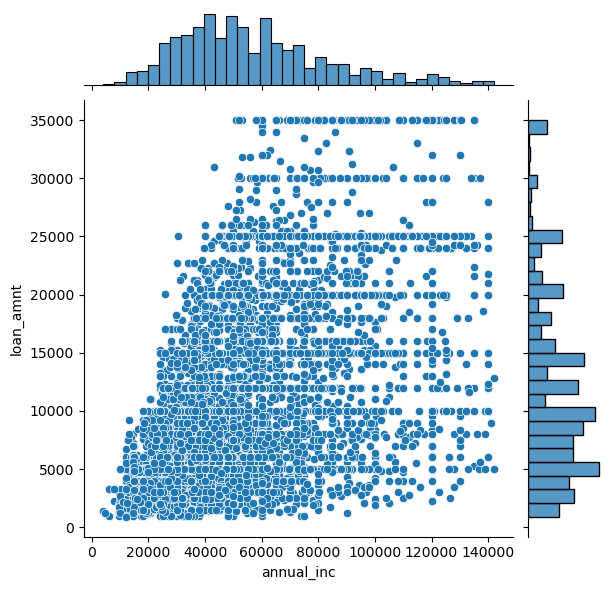

In [66]:
# Distribution of loan amount and annual income for charged off applicants

loan_chargeoff=loan_df[loan_df.loan_status=='Charged Off']
sns.jointplot(data=loan_chargeoff,x='annual_inc',y='loan_amnt')
plt.show()

#Observation: There is a cluster between annual income in range of 30k-60k and loan amount 4k-10k. Majority of the defaulters belongs to this combination of annual income and loan amount



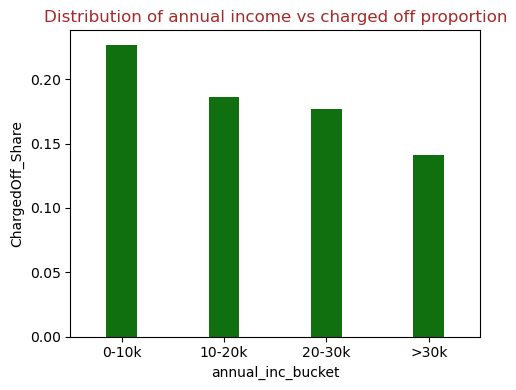

In [67]:
# Distribution of annual income vs charged off proportion

loan_annual_inc=loan_df

# creating buckets of annual income
def bucket_an(col):
    if col<=10000:
        return '0-10k'
    elif (col>10000) and (col<=20000):
        return '10-20k'
    elif (col>20000) and (col<=30000):
        return '20-30k'    
    else:
        return '>30k'
loan_annual_inc['annual_inc_bucket']=loan_annual_inc.apply(lambda x : bucket_an(x['annual_inc']),axis=1)
loan_income_loan=loan_annual_inc

# Creating a derived table and calculating charged off share for each annual income bucket
loan_annual_inc=loan_annual_inc.groupby(['annual_inc_bucket','loan_status']).loan_status.count().unstack()
loan_annual_inc['annual_inc_bucket']=loan_annual_inc.index
# Calculating charge off proportion for each annual income bucket and storing it in a new column
loan_annual_inc['ChargedOff_Share']=loan_annual_inc['Charged Off']/(loan_annual_inc['Charged Off']+loan_annual_inc['Fully Paid'])
plt.figure(figsize=(5,4))
# Plotting graph..
sns.barplot(data=loan_annual_inc,x='annual_inc_bucket',y='ChargedOff_Share',color='g',width=0.3)
plt.title("Distribution of annual income vs charged off proportion",fontdict={'fontsize': 12, 'fontweight' : 7, 'color' : 'Brown'})
plt.show()

# Observation: Chargeoff proportion decreases as annual income increases so there is a negative correlation between these two. Applicants with income on higher side are less risky candidates


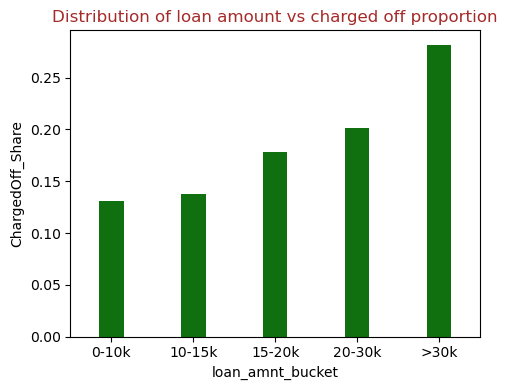

In [68]:
# Distribution of loan amount vs charged off proportion

loan_amnt=loan_df
def bucket_la(col):
    if col<=10000:
        return '0-10k'
    elif (col>10000) and (col<=15000):
        return '10-15k'
    elif (col>15000) and (col<=20000):
        return '15-20k'
    elif (col>20000) and (col<=30000):
        return '20-30k'
    else:
        return '>30k'
loan_amnt['loan_amnt_bucket']=loan_amnt.apply(lambda x : bucket_la(x['loan_amnt']),axis=1)
loan_amnt_intRate=loan_amnt
loan_amnt=loan_df.groupby(['loan_amnt_bucket','loan_status']).loan_status.count().unstack()
loan_amnt['loan_amnt_bucket']=loan_amnt.index
loan_amnt['ChargedOff_Share']=loan_amnt['Charged Off']/(loan_amnt['Charged Off']+loan_amnt['Fully Paid'])
plt.figure(figsize=(5,4))
sns.barplot(data=loan_amnt,x='loan_amnt_bucket',y='ChargedOff_Share',color='g',width=0.3)
plt.title("Distribution of loan amount vs charged off proportion",fontdict={'fontsize': 12, 'fontweight' : 7, 'color' : 'Brown'})
plt.show()

# Higher loan amount leads to risky applicants as chargeoff propertion is keeps on increasing with increase in loan amount.

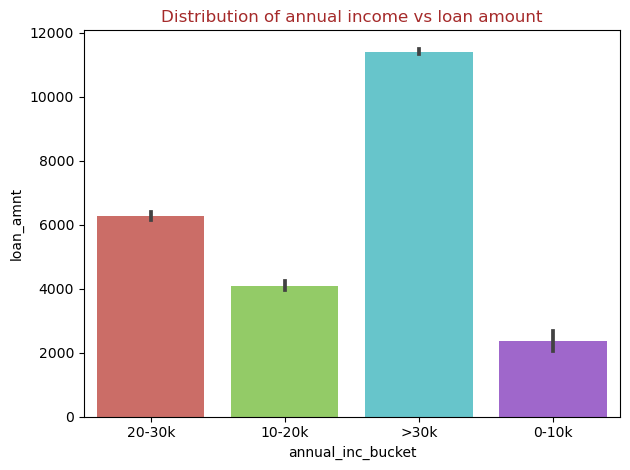

In [69]:
# Distribution of annual income vs loan amount bucket using barplot

sns.barplot(x='annual_inc_bucket',y='loan_amnt',data=loan_income_loan,palette='hls')
plt.title("Distribution of annual income vs loan amount",fontdict={'fontsize': 12, 'fontweight' : 7, 'color' : 'Brown'})
plt.show()

# Observation: People having high annual salary have taken high loan amount

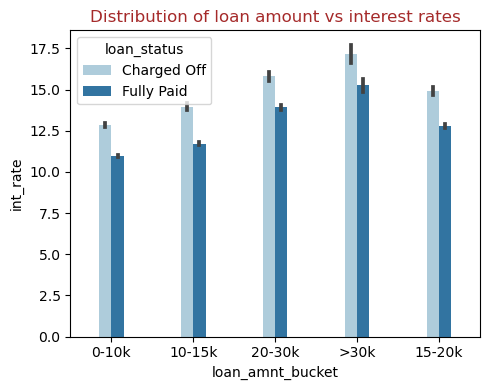

In [70]:
# Distribution of interest rate vs loan amount bucket using barplot


#loan_amnt=loan_df.groupby(['loan_amnt_bucket','int_rate']).loan_status.count().unstack()
plt.figure(figsize=(5,4))
sns.barplot(data=loan_amnt_intRate,x='loan_amnt_bucket',y='int_rate',hue='loan_status',palette='Paired',width=0.3)
plt.title("Distribution of loan amount vs interest rates",fontdict={'fontsize': 12, 'fontweight' : 7, 'color' : 'Brown'})
plt.show()

# Observation: For each category of loan amounts, charged off groups have high average interest rates. 

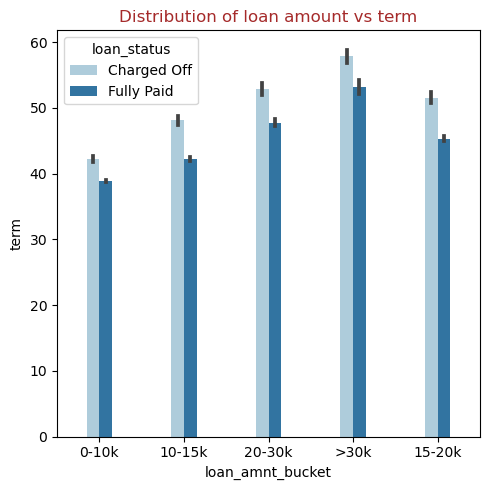

In [71]:
# Distribution of loan amount vs term
plt.figure(figsize=(5,5))
sns.barplot(data=loan_amnt_intRate,x='loan_amnt_bucket',y='term',hue='loan_status',palette='Paired',width=0.3)
plt.title("Distribution of loan amount vs term",fontdict={'fontsize': 12, 'fontweight' : 7, 'color' : 'Brown'})
plt.show()

# Observation: For each category of loan amounts, charged off groups have high mean loan term 

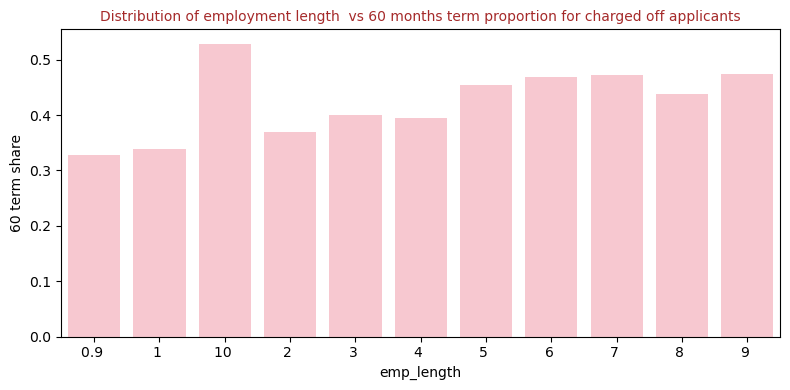

In [72]:
# Distribution of employment length  vs 60 months term chargeoff for charged off applicants

loan_chargeoff=loan_df[loan_df.loan_status=='Charged Off']
loan_chargeoff.term=loan_chargeoff.term.apply(lambda x: str(x)+"months")
# Creating derived table containing count of terms for each emp length category
loan_chargeoff=loan_chargeoff.groupby(['emp_length','term']).term.count().unstack()
loan_chargeoff['emp_length']=loan_chargeoff.index
# Calculating chanrgeoff proportion of 60 term term for each emp length category
loan_chargeoff['60 term share']=loan_chargeoff['60months']/(loan_chargeoff['60months']+loan_chargeoff['36months'])
plt.figure(figsize=(8,4))
# Plotting grapg
sns.barplot(data=loan_chargeoff,x='emp_length',y='60 term share',color='pink')
plt.title("Distribution of employment length  vs 60 months term proportion for charged off applicants",fontdict={'fontsize': 10, 'fontweight' : 7, 'color' : 'Brown'})
plt.show()


# Observation: Highest number of defaulted employees who are having more than 10 years of experience  took loan amount for 60 months term


**Conclusion**
1. The grade represent risk factor so interest rate increases with risk. Interest rate increases with decrease in grade 
2. High loan amount is approved for borrowers having high experience
3. Verified borrowers are high in number as compared to not verified. Also, number of borrowers having large loan amount are verified as compared to borrowers having low loan amount.
4. People who take higher loan amount prefer to have 60 months term
5. Large loan amount is approved for small business purpose
6. Borrowers who took loan for the purpose of small business are mostly getting charged off.
7. Loan provided on high interest rates are more likely to get charged off. 15-20% interest rate indicates high charge off proportion.
8. Verified borrowers are mostly getting charged off
9. Loans provided with higher grade are less likely to charge off as compared to lower grades
10. NE state reports high proportion of charged off borrowers
11. Borrowers having annual salary between 30k-50k are more likely be defaulters
12. Charged off borrowers having >10 years of experience have high proportion of 60 months term i.e. majority of defaulted people in 10+ years of experience have taken 60 months loan term.


## Insights Derived from the case study: 


### Univariate-

1. Defaulted loans are low in numbers as compared to Fully paid loans
2. The highest number of loans taken are from California state, followed by New York and so on.
3. Maximum type of loans taken belong to debt_consolidation category means majority of people like to combine all their loans in single loan
4. Approximately half of the borrower population are verified.
5. Majority of the people have rented or mortgage property.
6. Most loans belong to grade 'A' and 'B' and the number goes down as grade decreases, which also aligns to our observation that majority of the loans are fully paid so they might belong to grade A or B.
7. SUbgrade distribution aligns with grade distribution
8. Maximum borrowers have more than 10 years of employment
9. Number of borrowers increases as increase in months from Sept, Oct, Nov, Dec. Highest number of loans are taken in month of December
10. As year increases, number of borrowers increases. The loan approval rate increases exponentially with increase in year with highest reported in 2011.
11. The term of loan taken is highest around 36 months followed by 60 months.
12. Majority of Loan amount lies between 5000 to 15000, 50% of loan amount lies below 10k (approx.) and very few of them are on higher side. 
13. Distribution of funded amount, funded amounts by investors aligns with distribution of loan amount means borrowers got the requested loan amount.
14. Majority of the interest rate given by Lending CLub lies between 8.5% to 14.5% with a dip near 10%
15. Monthly installment is crowded between 165 to 415 (approx.) per month and negligible after 800
16. 75% of annual income lies below 80000 means people having income on higher side is less
17. Spread of high dti is more means there are many borrowers having large dti ratio.
18. Majority of borrowers having 0 public records, very few goes till 4


### Segmented- 

1. Majority of the people who are charged off have taken high loan amount as compared to people who fully paid the loan. Borrowers taking loan in the range 0-16k are mostly getting defaulted
3. Interest rate for charged off borrowers is high as compared to fully paid borrowers. High interest rate can lead to default borrowers.
5. Fully paid borrowers shown to have more annual income than charged off borrowers. High income might lead to less risky borrowers. Defaulters have 75% of annual income < 65k
6. Majority of charged off borrowers shows higher dti as compared to majority of full paid borrowers.
1. For B and C grades, the number of charged off borrowers are almost same but there is a significant difference in fully paid borrowers in B and C grades.Majority of the borrowers who fully repaid the loan were assigned B grade.
2. Charged off and fully paid borrowers are high where employee experience is more than 10+ years as compared to other years. 
3. 36 months of term has higher chances of repaying full loan as compared to 60 months terms.
4. Charged off and fully paid borrowers are highest among debt_consolidation category

### Bivariate-

1. The grade represent risk factor so interest rate increases with risk. Interest rate increases with decrease in grade 
2. High loan amount is approved for borrowers having high experience
3. Verified borrowers are high in number as compared to not verified. Mostly verified borrowers are getting higher loan amount as compared to borrowers having low loan amount.
4. Large loan amount was approved for borrowers requesting loan for small business purpose
5. People who take higher loan amount prefer to have 60 months term
6. Verified borrowers have high defaulter proportion rate.
7. Highest number of defaulted employees who are having more than 10 years of experience  took loan amount for 60 months term
8. For each category of loan amounts, charged off groups have high interest rates.

### Driver variables to predict defaulters-
1. Grade
2. Interest Rate
3. Annual Income
4. Term
5. Purpose 
6. Loan amount

### Considerations for 'default' borrowers-
1. Borrowers with >10 years of experience with term 60 months.
2. Borrowers who request loan for the purpose of small business.
3. Loan provided on high interest rates (15-20%)
4. Borrowers with annual salary between 30k-50k and loan amount 4k-10k 
5. Burrowers with grades on lower side like E,F,G which indicates high risk

